 <center><h1> Building Machine Learning Pipelines: Data Analysis Phase 1</h1></center>
  
  <h2>Project Name: Flight Price Prediction</h2>
       
<h2>Problem Statement</h2>

Flight ticket prices can be something hard to guess, today we might see a price, check
out the price of the same flight tomorrow, it will be a different story. We might have often
heard travelers saying that flight ticket prices are so unpredictable. That’s why we will
try to use machine learning to solve this problem. This can help airlines by predicting
what prices they can maintain.

## Type of Machine Learning Problem :- Supervised Regression Techniques

<center><h2>Data Analysis Phase</h2></center>



# Exploratory Data Analysis (EDA)

This is a crucial step in the data analysis process. It involves examining and understanding the structure, patterns, and relationships within the data before applying any modeling or statistical techniques. EDA helps to uncover insights, identify data quality issues, and guide further analysis.

In [3]:

#Loading the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [4]:
## loading dataset
data=pd.read_excel('Flight_Fare.xlsx')

In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
data.shape

(10683, 11)

<strong>FEATURES</strong>

The various features of the dataset are explained below:
1.	<strong>Airline (CATEGORICAL)</strong>: So this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.
    
2.	<strong>Date_of_Journey (DATE)</strong>: This column will let us know about the date on which the passenger’s journey will start.
    
3.	<strong>Source (CATEGORICAL)</strong>: This column holds the name of the place from where the passenger’s journey will start.
    
4.	<strong>Destination (CATEGORICAL)</strong>: This column holds the name of the place to where passengers wanted to travel.
    
5.	<strong>Route (CATEGORICAL)</strong>: Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.
    
6.	<strong>Arrival_Time (TIME)</strong>: Arrival time is when the passenger will reach his/her destination.
    
7.	<strong>Duration (TIME)</strong>: Duration is the whole period that a flight will take to complete its journey from source to destination.
    
8.	<strong>Total_Stops (CATEGORICAL)</strong>: This will let us know in how many places flights will stop there for the flight in the whole journey.
    
9.	<strong>Additional_Info (CATEGORICAL)</strong>: In this column, we will get information about food, kind of food, and other amenities.
    
10.	<strong>Price (CONTINEOUS)</strong>: Price of the flight for a complete journey including all the expenses before onboarding.



In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


checking the basic information about the dataset
we realized that we have object datatype and int datatype

In [10]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

from the above summary of missing values, we have two missing value in total from route feature and total_stops. that needs to be treated

# Airline Univariate Data Analysis

In [11]:
data["Airline"].isnull().sum()

0

In [12]:
data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [13]:
data["Airline"].dtypes

dtype('O')

In [14]:
data["Airline"].unique() #checking for mix spelling for Airline

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

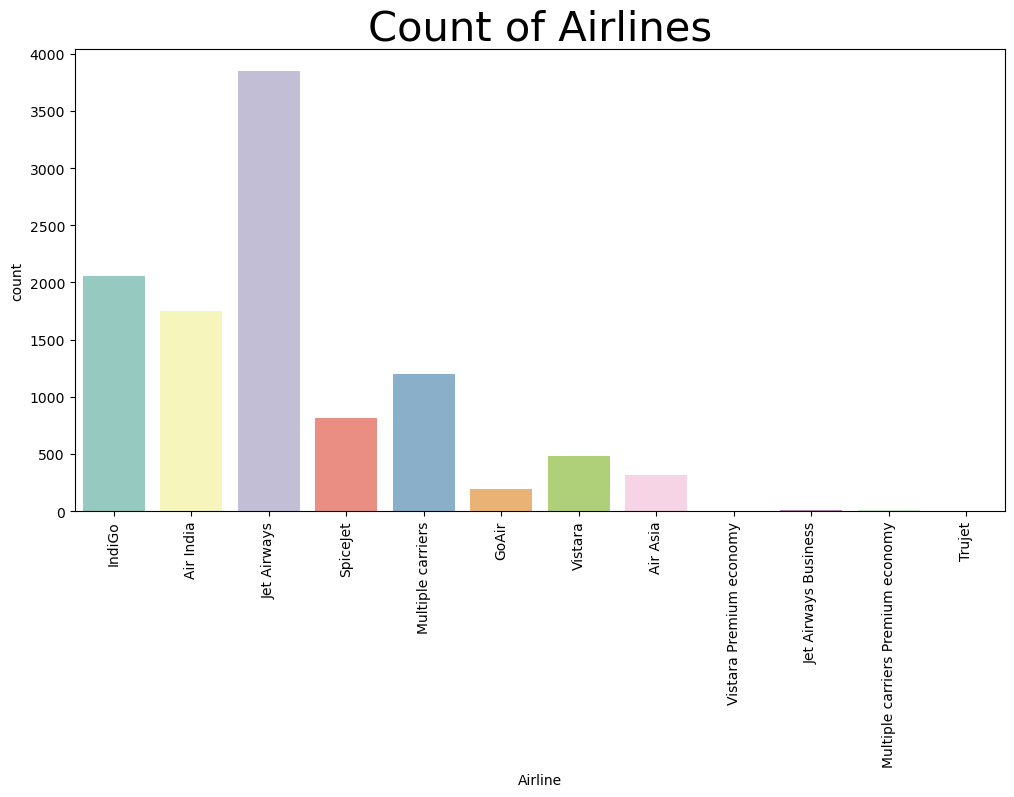

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data.Airline, palette='Set3')
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Airline prices ')

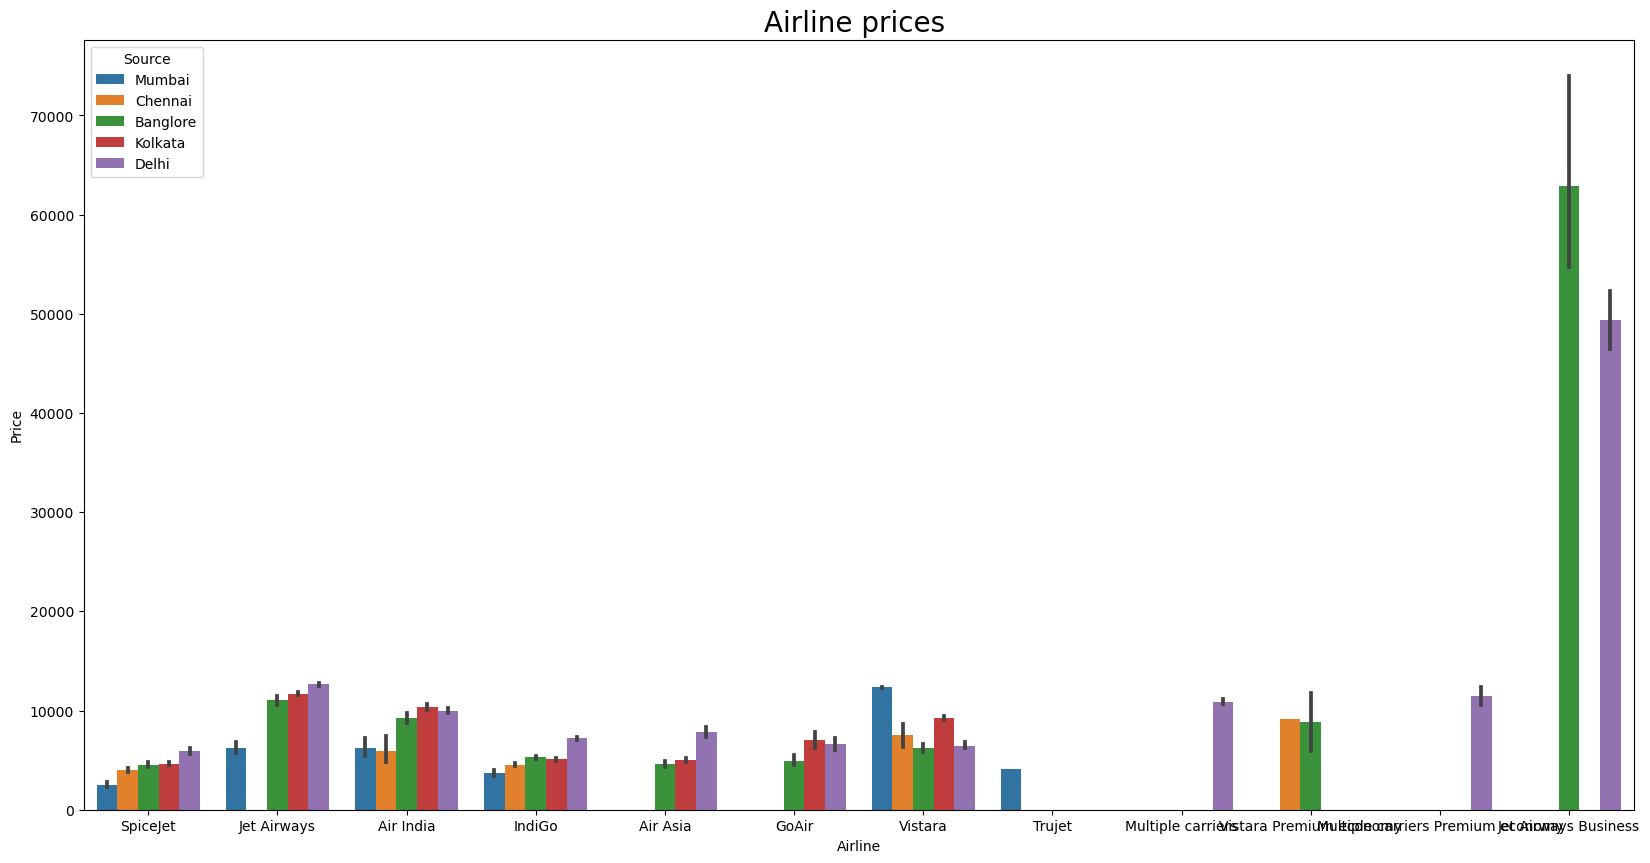

In [32]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Airline',y='Price',hue="Source",data=data.sort_values("Price")).set_title('Airline prices ',fontsize=20)



# Airline Summary

From the above Airline Exploration:
1. We come to conclusion that airline has no missing value
2. All the items are unique and that there is no miss spell item in airline
3. Jet Airways has the highest value count with over 3849, that reflects in the bar chat
4.  airline price based on source we realized that banglaru has the highest price followed by Delhi

# Date of Journey Data Analysis

In [22]:
data["Date_of_Journey"].dtype

dtype('O')

In [23]:
data["Date_Embarked"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [24]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Embarked
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


In [25]:
data["month_Embarked"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [26]:
data["year_Embarked"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.year

In [27]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Embarked,month_Embarked,year_Embarked
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


From description we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction
For this we had to use pandas to_datetime to convert object data type to datetime dtype.

# Source Univariate Data Analysis

In [28]:
data["Source"].isnull().sum()

0

In [29]:
data["Source"].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [30]:
data["Source"].unique() #checking for mix spelling for Source

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

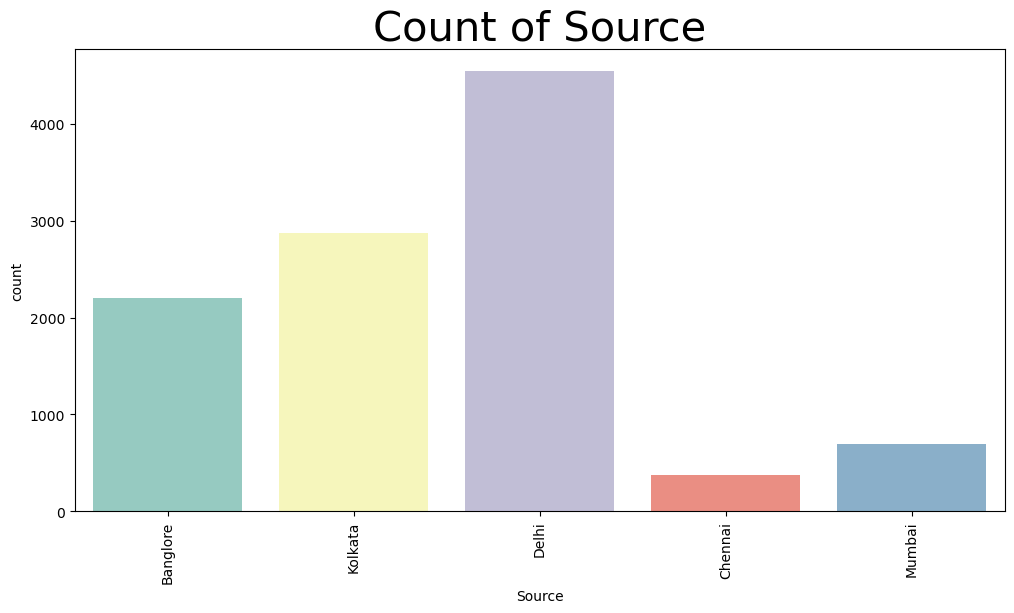

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(data.Source, palette='Set3')
plt.title('Count of Source', size=30)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Airline prices Based on Source ')

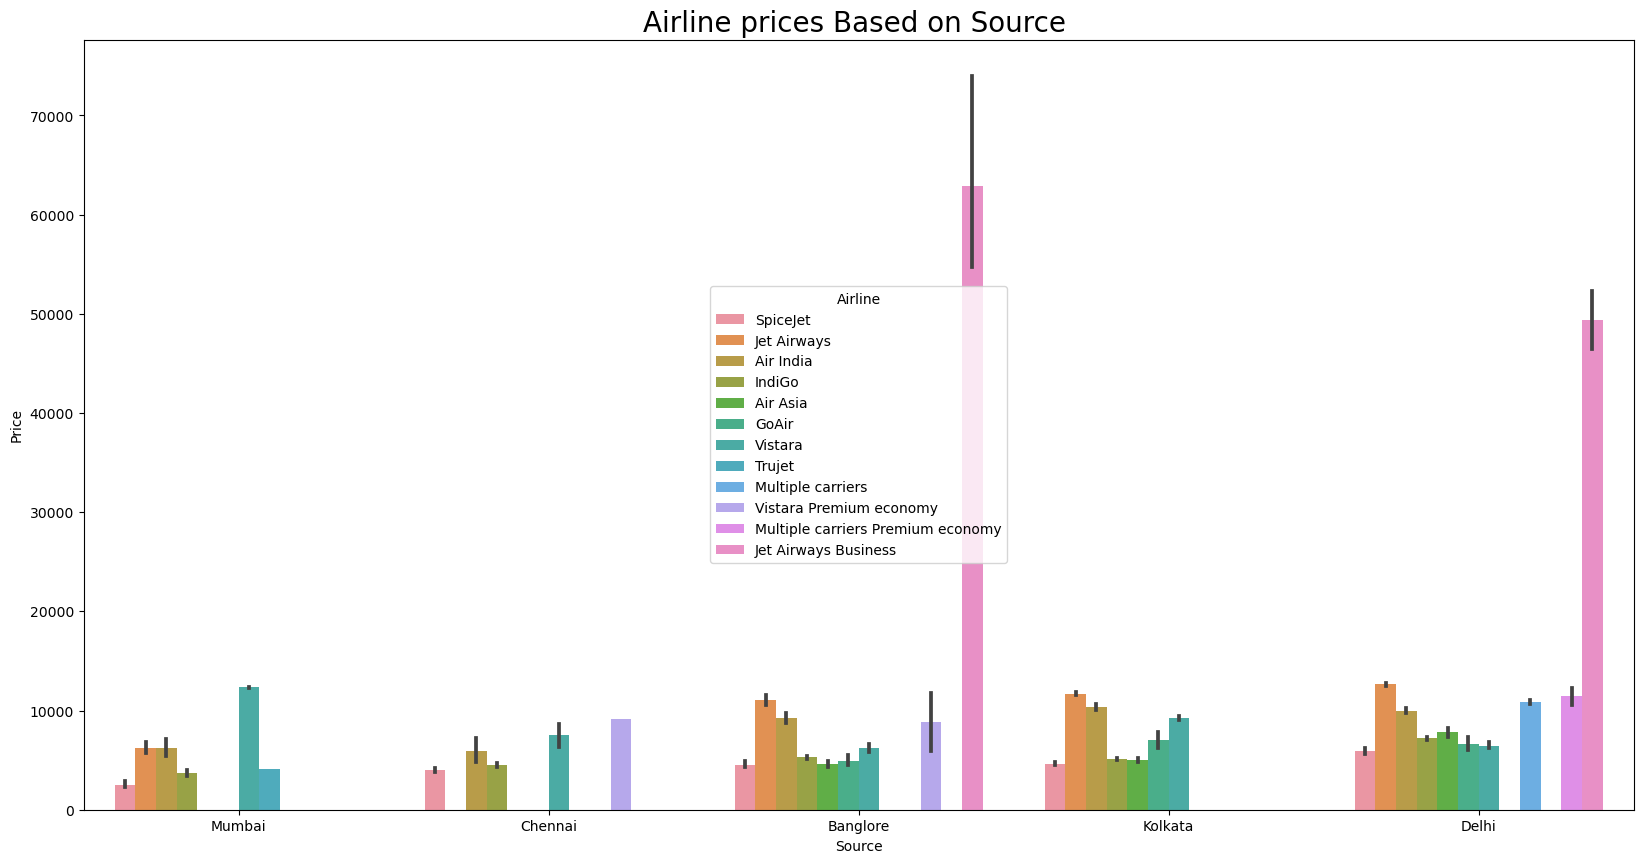

In [34]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Source',y='Price',hue="Airline",data=data.sort_values("Price")).set_title('Airline prices Based on Source ',fontsize=20)


# Source Summary

From the above Source Exploration:
1. We come to conclusion that Source has no missing value
2. All the items are unique and that there is no miss spell item in Source feature
3. Delhi has the highest value count with over 4537, that reflects in the bar chat
4.  airline price based on source we realized that banglaru has the highest price followed by Delhi and also Jet Airways Business 
is more patronized than other

# Destination Univariate Data Analysis

In [36]:
data["Destination"].isnull().sum()

0

In [37]:
data["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [38]:
data["Destination"].unique() #checking for mix spelling for Destination

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [44]:
data["Destination"] = data["Destination"].replace('New Delhi', 'Delhi') #replacing New Delhi with Delhi

In [45]:
data["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

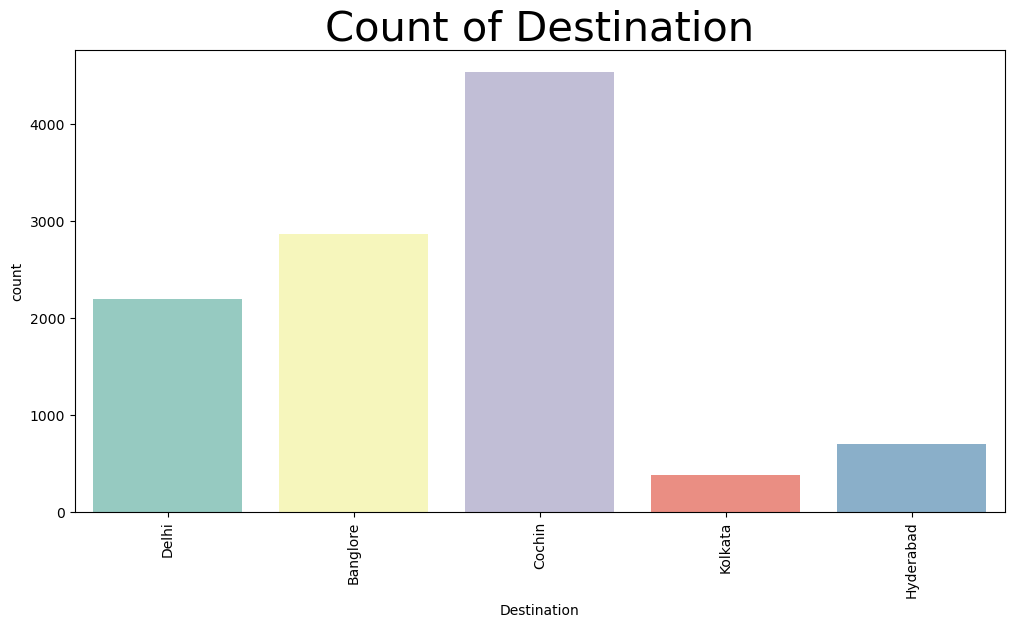

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(data.Destination, palette='Set3')
plt.title('Count of Destination', size=30)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Airline prices Based on Destination ')

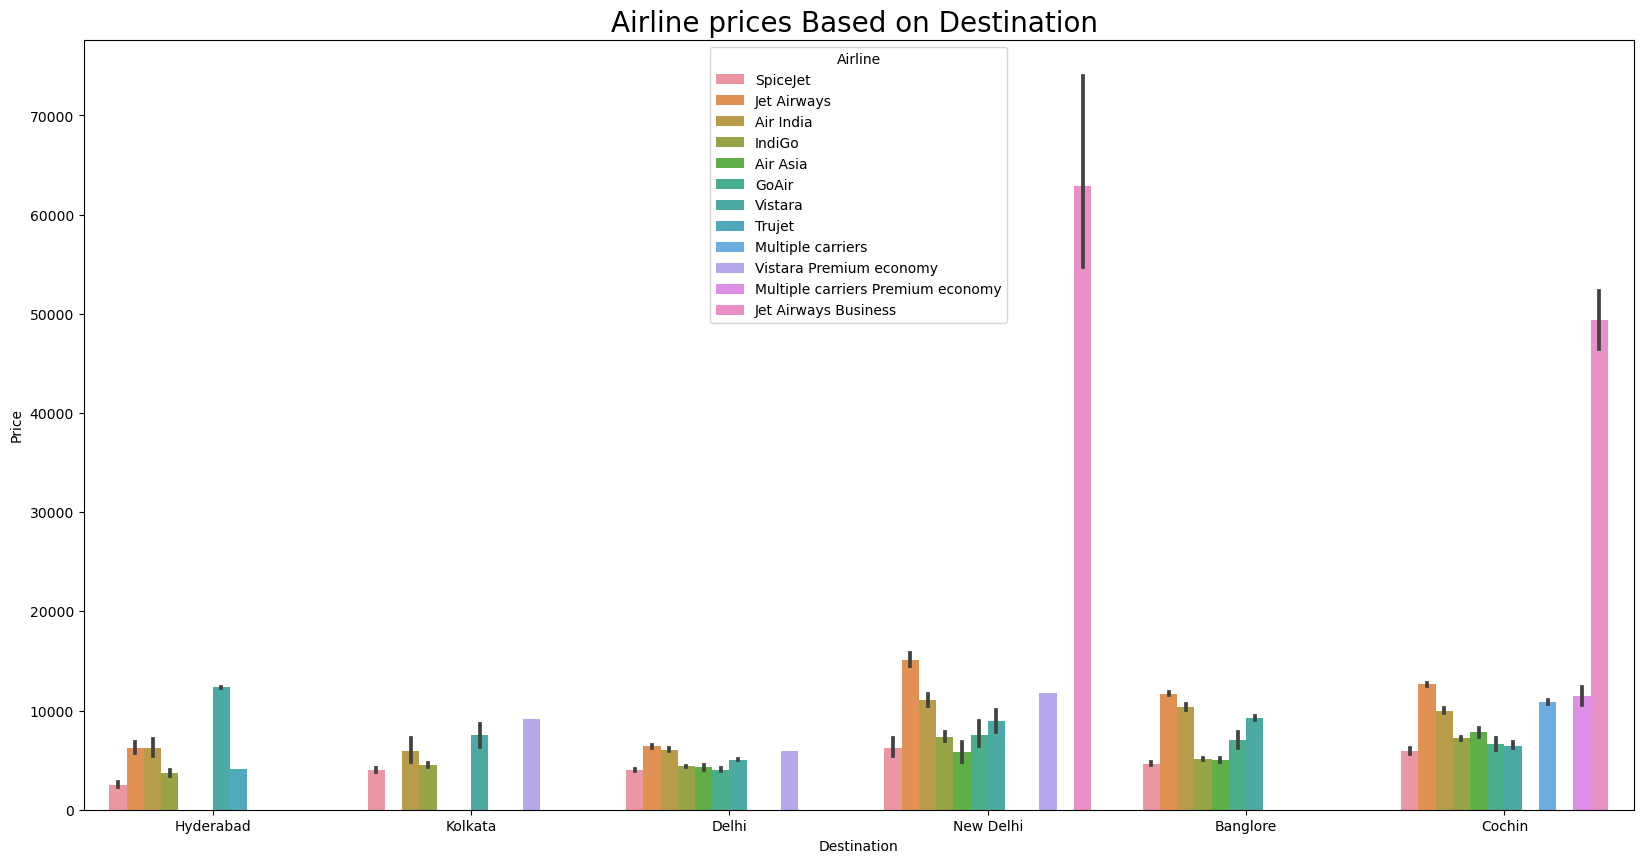

In [40]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Destination',y='Price',hue="Airline",data=data.sort_values("Price")).set_title('Airline prices Based on Destination ',fontsize=20)



# Destination Summary

From the above Destination Exploration:
1. We come to conclusion that Destination has no missing value
2. All the items are unique and that there is no miss spell item in Destination feature
3. Cochin has the highest value count with over 4537, that reflects in the bar chat
4.  airline price based on Destination we realized that Cochin  has the highest Destination count price followed by Delhi and also Jet Airways Business  is more patronized than other

# Route Univariate Data Analysis

In [47]:
data["Route"].isnull().sum()

1

In [48]:
data["Route"].dtype

dtype('O')

In [49]:
data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10683, dtype: object

In [50]:
# we realized that the route features has a character that does not make sence, so we need to strip out the -> character

data['Routes'] = data['Route'].str.replace(' → ', '')

In [51]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Embarked,month_Embarked,year_Embarked,Routes
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,BLRDEL
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,CCUIXRBBIBLR
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,DELLKOBOMCOK
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,CCUNAGBLR
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,BLRNAGDEL


In [52]:
data["Routes"].value_counts()

DELBOMCOK       2376
BLRDEL          1552
CCUBOMBLR        979
CCUBLR           724
BOMHYD           621
                ... 
CCUVTZBLR          1
CCUIXZMAABLR       1
BOMCOKMAAHYD       1
BOMCCUHYD          1
BOMBBIHYD          1
Name: Routes, Length: 128, dtype: int64

In [53]:
data["Routes"].unique()

array(['BLRDEL', 'CCUIXRBBIBLR', 'DELLKOBOMCOK', 'CCUNAGBLR', 'BLRNAGDEL',
       'CCUBLR', 'BLRBOMDEL', 'DELBOMCOK', 'DELBLRCOK', 'MAACCU',
       'CCUBOMBLR', 'DELAMDBOMCOK', 'DELPNQCOK', 'DELCCUBOMCOK',
       'BLRCOKDEL', 'DELIDRBOMCOK', 'DELLKOCOK', 'CCUGAUDELBLR',
       'DELNAGBOMCOK', 'CCUMAABLR', 'DELHYDCOK', 'CCUHYDBLR', 'DELCOK',
       'CCUDELBLR', 'BLRBOMAMDDEL', 'BOMDELHYD', 'DELMAACOK', 'BOMHYD',
       'DELBHOBOMCOK', 'DELJAIBOMCOK', 'DELATQBOMCOK', 'DELJDHBOMCOK',
       'CCUBBIBOMBLR', 'BLRMAADEL', 'DELGOIBOMCOK', 'DELBDQBOMCOK',
       'CCUJAIBOMBLR', 'CCUBBIBLR', 'BLRHYDDEL', 'DELTRVCOK',
       'CCUIXRDELBLR', 'DELIXUBOMCOK', 'CCUIXBBLR', 'BLRBOMJDHDEL',
       'DELUDRBOMCOK', 'DELHYDMAACOK', 'CCUBOMCOKBLR', 'BLRCCUDEL',
       'CCUBOMGOIBLR', 'DELRPRNAGBOMCOK', 'DELHYDBOMCOK', 'CCUDELAMDBLR',
       'CCUPNQBLR', 'BLRCCUGAUDEL', 'CCUDELCOKBLR', 'BLRPNQDEL',
       'BOMJDHDELHYD', 'BLRBOMBHODEL', 'DELAMDCOK', 'BLRLKODEL',
       'CCUGAUBLR', 'BOMGOIHYD', 'CCUBOMAMDB

In [54]:
## getting the indexes of rows where values are missing in specific column
missing_Routes_data=np.where(data['Routes'].isnull()==True)

In [55]:
missing_Routes_data

(array([9039]),)

In [56]:
##getting the actual data from the indexes
data.iloc[missing_Routes_data]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Embarked,month_Embarked,year_Embarked,Routes
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480,6,5,2019,NaN


In [57]:
# imputing the missing value

#data.iloc[missing_Routes_data, 'Routes'] = 'DELBOMCOK'

data.loc[data.Routes.isnull(), 'Routes']

9039    NaN
Name: Routes, dtype: object

In [58]:
data.iloc[missing_Routes_data]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Embarked,month_Embarked,year_Embarked,Routes
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480,6,5,2019,NaN


In [59]:
data.loc[data.Routes.isnull(), 'Routes'] = 'DELBOMCOK'

In [60]:
data.iloc[missing_Routes_data]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Embarked,month_Embarked,year_Embarked,Routes
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480,6,5,2019,DELBOMCOK


In [61]:
data["Routes"].isnull().sum()

0

In [62]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Embarked,month_Embarked,year_Embarked,Routes
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,BLRDEL
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,CCUIXRBBIBLR
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,DELLKOBOMCOK
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,CCUNAGBLR
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,BLRNAGDEL


# Dep_Time Univariate Data Analysis

In [67]:
data["Dep_Time"].isnull().sum()

0

In [63]:
data["Dep_Hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_Min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

# Arrival_Time Univariate Data Analysis

In [68]:
data["Dep_Time"].isnull().sum()

0

In [69]:
data["Arr_Hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arr_Min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute

In [70]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Embarked,month_Embarked,year_Embarked,Routes,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,BLRDEL,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,CCUIXRBBIBLR,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,DELLKOBOMCOK,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,CCUNAGBLR,18,5,23,30
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,BLRNAGDEL,16,50,21,35


# Duration Univariate Data Analysis

In [72]:
data["Duration"].isnull().sum()

0

In [73]:
data["Duration"] = data["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","1").apply(eval)

In [74]:
data["Duration"]

0         621
1         671
2        1140
3         551
4         691
         ... 
10678     421
10679     471
10680     180
10681     521
10682     681
Name: Duration, Length: 10683, dtype: int64

<AxesSubplot:ylabel='Density'>

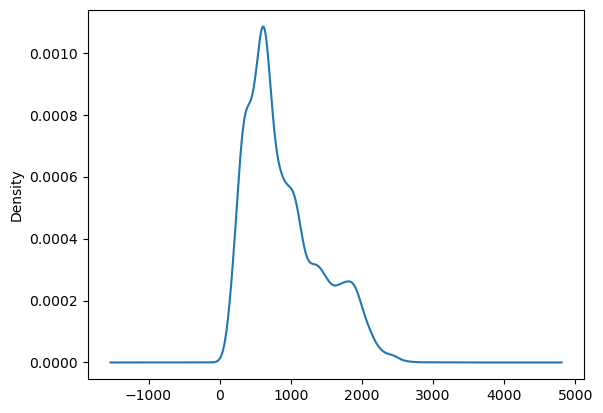

In [75]:
data.Duration.plot(kind='density')

# Total_Stops Univariate Data Analysis

In [76]:
data["Total_Stops"].isnull().sum()

1

In [77]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [78]:
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [79]:
data["Total_Stops"].value_counts()

1.0    5625
0.0    3491
2.0    1520
3.0      45
4.0       1
Name: Total_Stops, dtype: int64

In [80]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Embarked,month_Embarked,year_Embarked,Routes,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,621,0.0,No info,3897,24,3,2019,BLRDEL,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,671,2.0,No info,7662,1,5,2019,CCUIXRBBIBLR,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2.0,No info,13882,9,6,2019,DELLKOBOMCOK,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,551,1.0,No info,6218,12,5,2019,CCUNAGBLR,18,5,23,30
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,691,1.0,No info,13302,1,3,2019,BLRNAGDEL,16,50,21,35


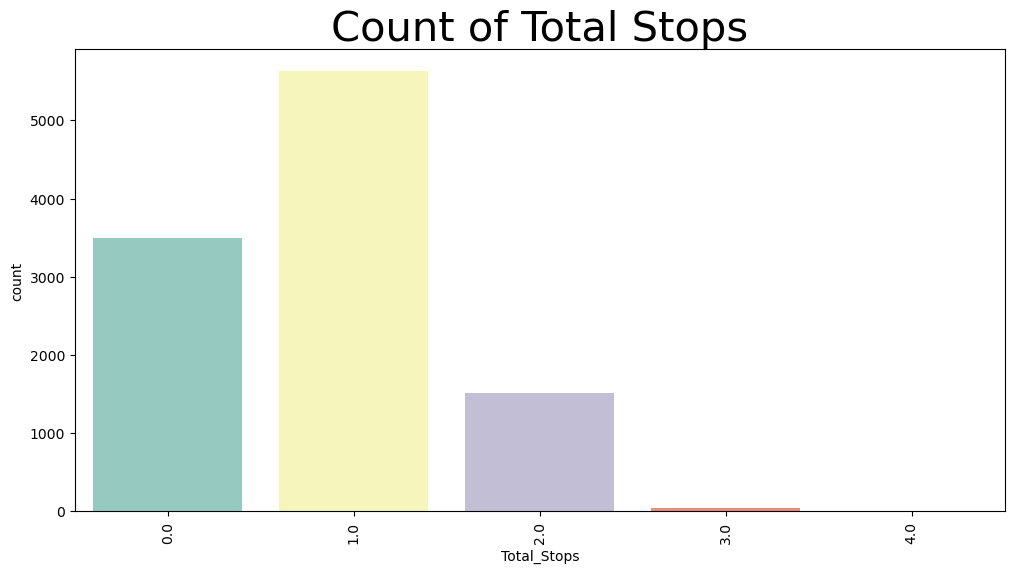

In [81]:
plt.figure(figsize=(12,6))
sns.countplot(data.Total_Stops, palette='Set3')
plt.title('Count of Total Stops', size=30)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Airline prices Based on Destination ')

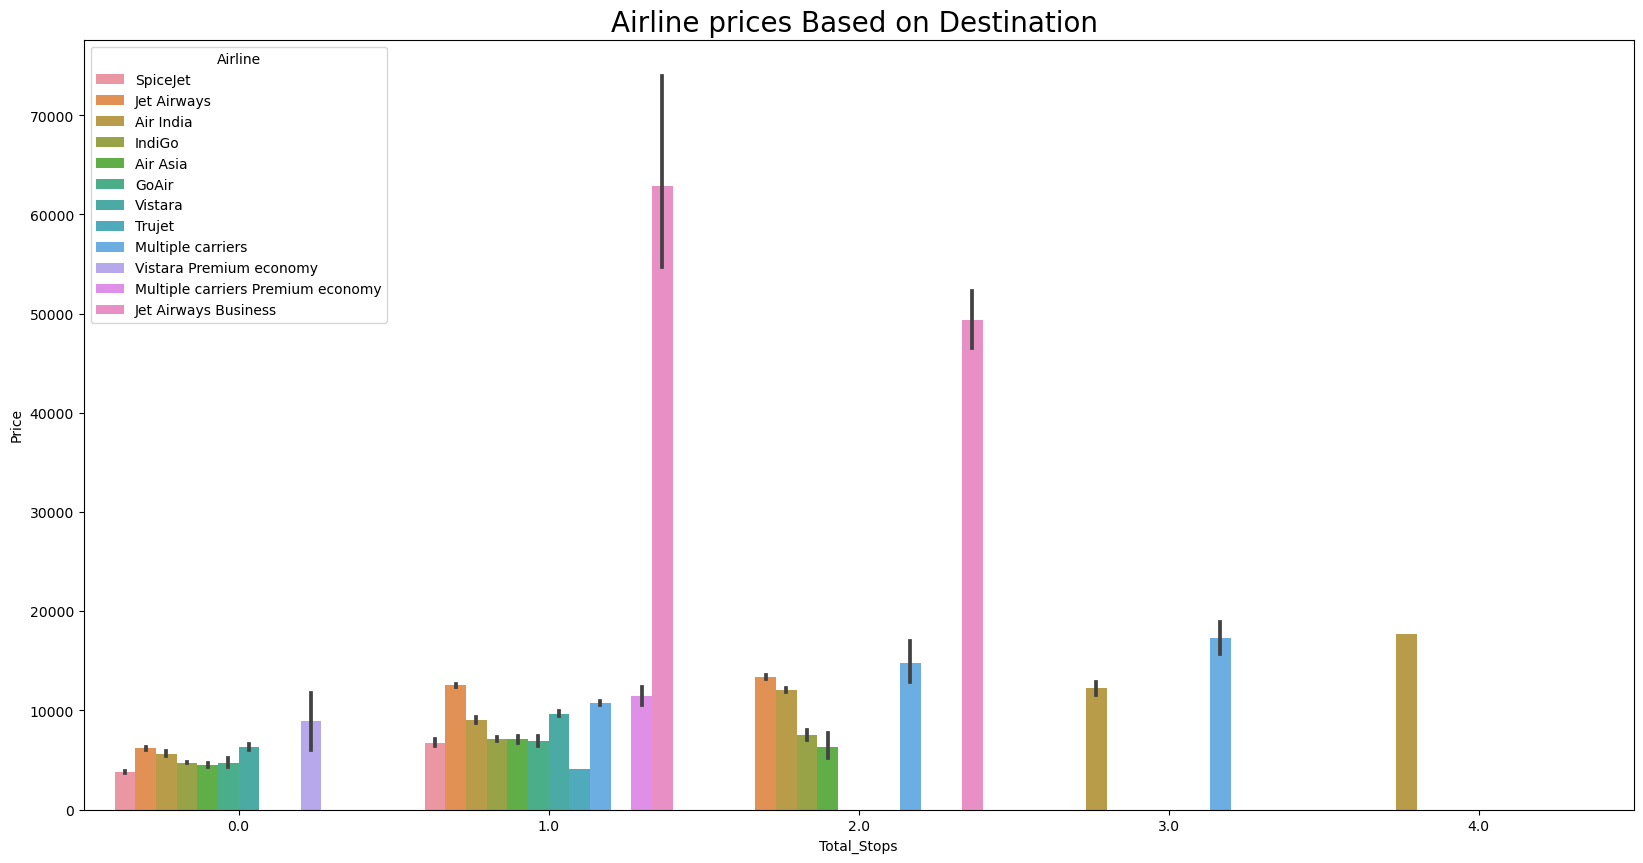

In [82]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Total_Stops',y='Price',hue="Airline",data=data.sort_values("Price")).set_title('Airline prices Based on Destination ',fontsize=20)


# Additional_Info Univariate Data Analysis

In [83]:
data["Additional_Info"].dtypes

dtype('O')

In [84]:
data["Additional_Info"].isnull().sum()

0

In [85]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

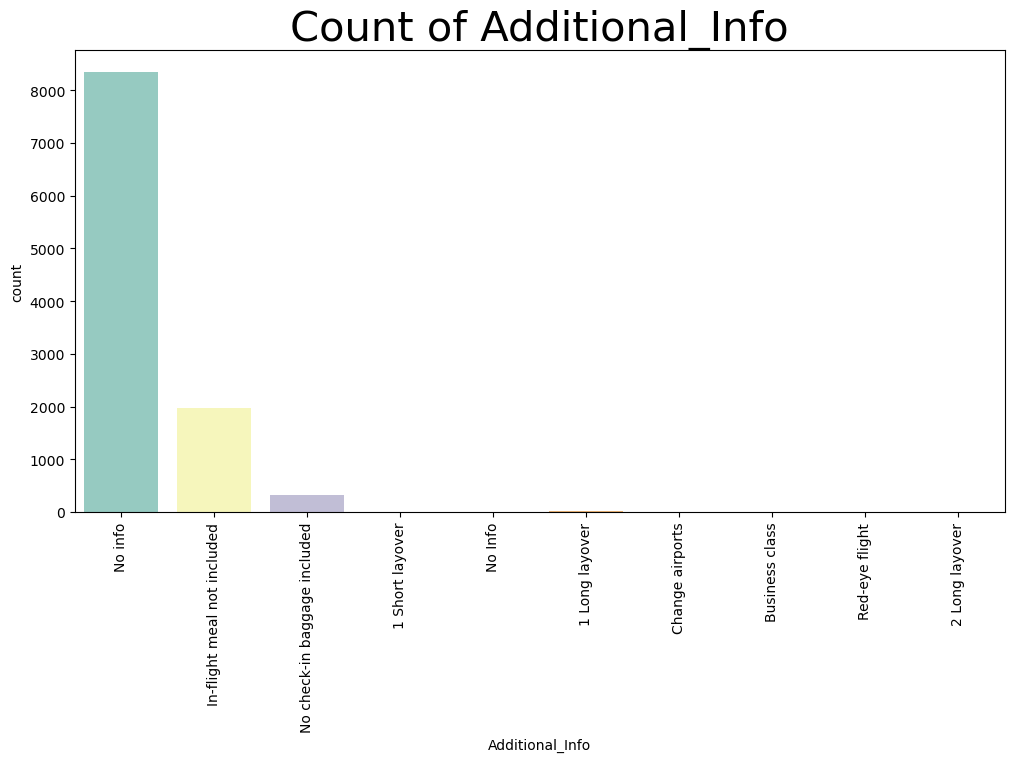

In [86]:
plt.figure(figsize=(12,6))
sns.countplot(data.Additional_Info, palette='Set3')
plt.title('Count of Additional_Info', size=30)
plt.xticks(rotation=90)
plt.show()

# Price Univariate Data Analysis " Target Variable"

In [87]:
data["Price"].isnull().sum()

0

Text(0.5, 1.0, 'Flight Price Distribution Plot')

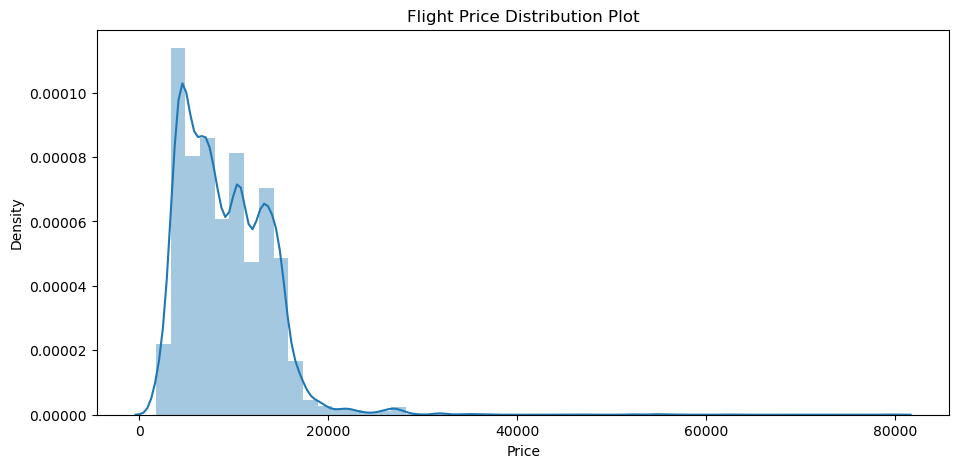

In [88]:
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize=[11,5])
sns.distplot(data['Price'])
plt.title('Flight Price Distribution Plot')

In [89]:
data["Price"].max()

79512

In [90]:
data["Price"].min()

1759

# Date_Embarked and month_Embarked Univariate Data Analysis

In [91]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Embarked,month_Embarked,year_Embarked,Routes,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,621,0.0,No info,3897,24,3,2019,BLRDEL,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,671,2.0,No info,7662,1,5,2019,CCUIXRBBIBLR,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2.0,No info,13882,9,6,2019,DELLKOBOMCOK,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,551,1.0,No info,6218,12,5,2019,CCUNAGBLR,18,5,23,30
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,691,1.0,No info,13302,1,3,2019,BLRNAGDEL,16,50,21,35


Text(0.5, 1.0, 'Airline prices based on month_Embarked')

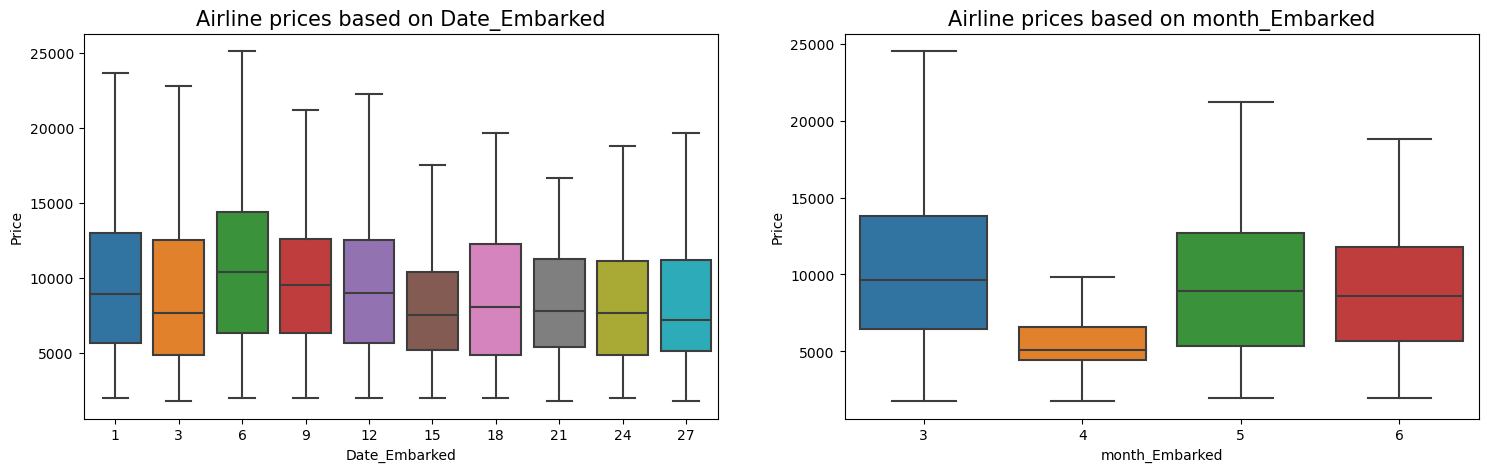

In [94]:


plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=data, y="Price", x="Date_Embarked",showfliers=False).set_title("Airline prices based on Date_Embarked",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=data, y="Price", x="month_Embarked",showfliers=False).set_title("Airline prices based on month_Embarked",fontsize=15)



# Dep_Hour and Dep_Min Univariate Data Analysis


Text(0.5, 1.0, 'Airline prices based on Dep_Min')

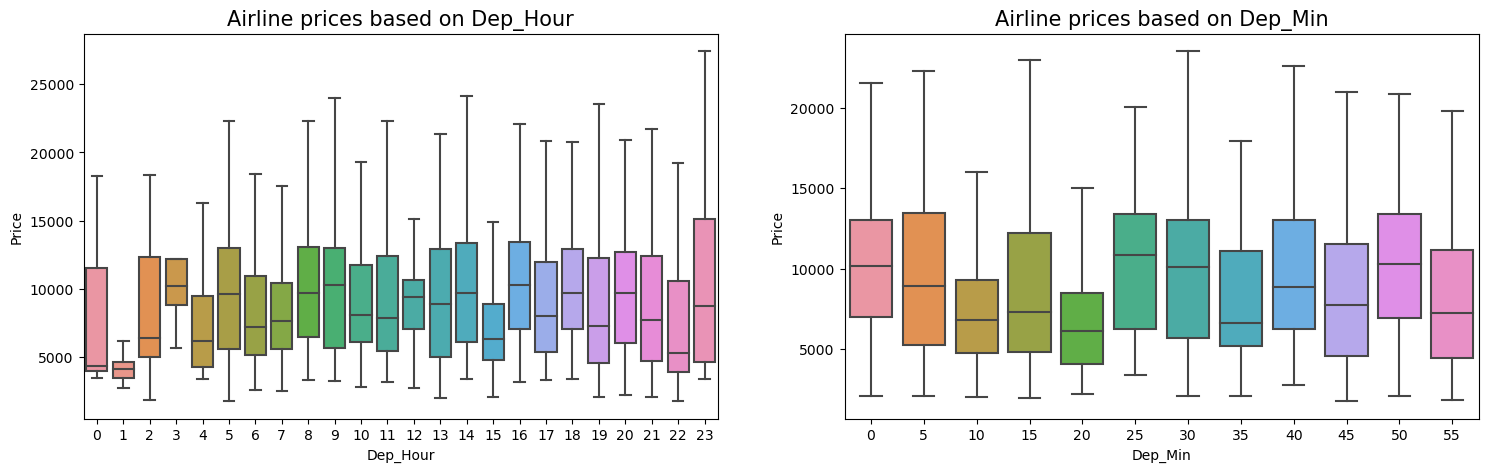

In [97]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=data, y="Price", x="Dep_Hour",showfliers=False).set_title("Airline prices based on Dep_Hour",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=data, y="Price", x="Dep_Min",showfliers=False).set_title("Airline prices based on Dep_Min",fontsize=15)



# Arr_Hour and Arr_Min Univariate Data Analysis



Text(0.5, 1.0, 'Airline prices based on Arr_Min')

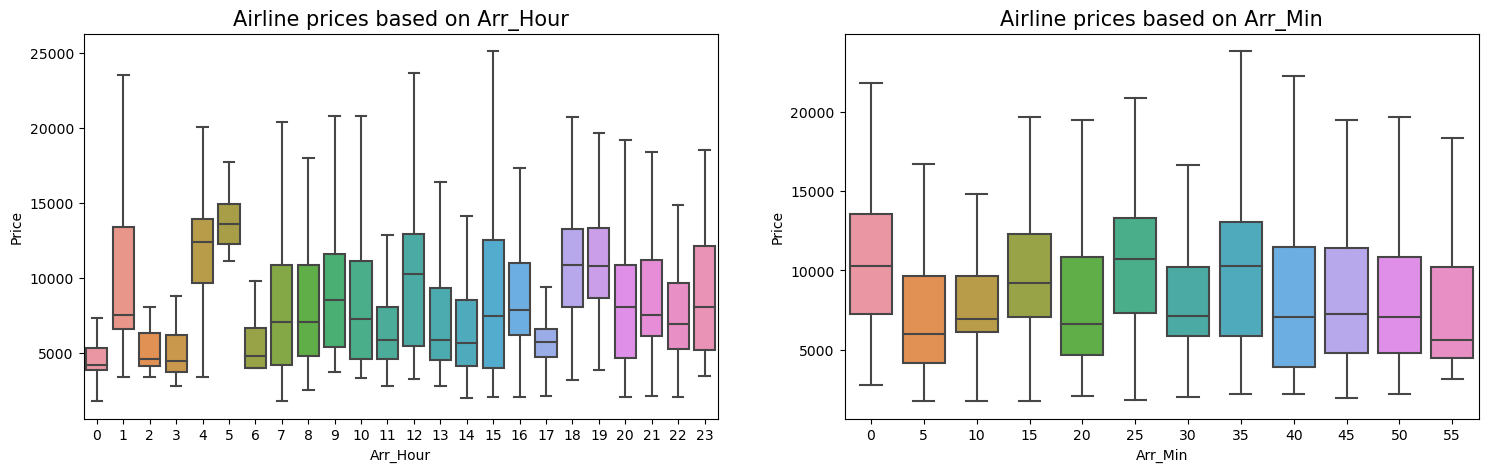

In [99]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=data, y="Price", x="Arr_Hour",showfliers=False).set_title("Airline prices based on Arr_Hour",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=data, y="Price", x="Arr_Min",showfliers=False).set_title("Airline prices based on Arr_Min",fontsize=15)




# Dropping Features that are Irrelevant

In [100]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_Embarked,month_Embarked,year_Embarked,Routes,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,621,0.0,No info,3897,24,3,2019,BLRDEL,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,671,2.0,No info,7662,1,5,2019,CCUIXRBBIBLR,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2.0,No info,13882,9,6,2019,DELLKOBOMCOK,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,551,1.0,No info,6218,12,5,2019,CCUNAGBLR,18,5,23,30
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,691,1.0,No info,13302,1,3,2019,BLRNAGDEL,16,50,21,35


In [101]:
data["year_Embarked"].unique()

array([2019])

In [ ]:
data.drop(["Route"], axis = 1, inplace = True)
data.drop(["Dep_Time"], axis = 1, inplace = True)
data.drop(["Arrival_Time"], axis = 1, inplace = True)
data.drop(["year_Embarked"], axis = 1, inplace = True)


In [106]:
data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [107]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date_Embarked,month_Embarked,Routes,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,Delhi,621,0.0,No info,3897,24,3,BLRDEL,22,20,1,10
1,Air India,Kolkata,Banglore,671,2.0,No info,7662,1,5,CCUIXRBBIBLR,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,9,6,DELLKOBOMCOK,9,25,4,25
3,IndiGo,Kolkata,Banglore,551,1.0,No info,6218,12,5,CCUNAGBLR,18,5,23,30
4,IndiGo,Banglore,Delhi,691,1.0,No info,13302,1,3,BLRNAGDEL,16,50,21,35


In [108]:
data.isna().sum()

Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Date_Embarked      0
month_Embarked     0
Routes             0
Dep_Hour           0
Dep_Min            0
Arr_Hour           0
Arr_Min            0
dtype: int64

In [109]:
missing_Total_Stops_data=np.where(data['Total_Stops'].isnull()==True)

In [110]:
##getting the actual data from the indexes
data.iloc[missing_Total_Stops_data]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date_Embarked,month_Embarked,Routes,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
9039,Air India,Delhi,Cochin,1781,NaN,No info,7480,6,5,DELBOMCOK,9,45,9,25


In [111]:
data.loc[data.Total_Stops.isnull(), 'Total_Stops'] = 1.0

In [112]:
data.iloc[missing_Total_Stops_data]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date_Embarked,month_Embarked,Routes,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
9039,Air India,Delhi,Cochin,1781,1.0,No info,7480,6,5,DELBOMCOK,9,45,9,25


In [114]:
data.isna().sum()

Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Date_Embarked      0
month_Embarked     0
Routes             0
Dep_Hour           0
Dep_Min            0
Arr_Hour           0
Arr_Min            0
dtype: int64

# Statistical Analysis for Numerical Data

In [115]:
# for numerical

data.describe()

,Duration,Total_Stops,Price,Date_Embarked,month_Embarked,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,898.946176,0.824207,9087.064121,13.508378,4.708602,12.490686,24.411214,13.348778,24.690630
std,516.476072,0.675199,4611.359167,8.479277,1.164357,5.748650,18.767980,6.859125,16.506036
min,51.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,511.000000,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,751.000000,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,1200.000000,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,3221.000000,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000


In [116]:
# for categoricals

data.describe(include='object')

,Airline,Source,Destination,Additional_Info,Routes
count,10683,10683,10683,10683,10683
unique,12,5,5,10,128
top,Jet Airways,Delhi,Cochin,No info,DELBOMCOK
freq,3849,4537,4537,8345,2377


In [117]:
types = data.dtypes
print(types)

Airline             object
Source              object
Destination         object
Duration             int64
Total_Stops        float64
Additional_Info     object
Price                int64
Date_Embarked        int64
month_Embarked       int64
Routes              object
Dep_Hour             int64
Dep_Min              int64
Arr_Hour             int64
Arr_Min              int64
dtype: object


## Converting all the int datatype to float 

In [118]:
# converting all the int datatype to float 

data['Duration'] = data['Duration'].astype(float)
data['Date_Embarked'] = data['Date_Embarked'].astype(float)
data['month_Embarked'] = data['month_Embarked'].astype(float)
data['Dep_Hour'] = data['Dep_Hour'].astype(float)
data['Dep_Min'] = data['Dep_Min'].astype(float)
data['Arr_Hour'] = data['Arr_Hour'].astype(float)
data['Arr_Min'] = data['Arr_Min'].astype(float)

### Seperate numeriacl from categorical features

In [119]:
# Seperate numeriacl from categorical features

cont_data = data.select_dtypes('float64').columns
print(cont_data)
cat_data = data.select_dtypes('object').columns
print(cat_data)

Index(['Duration', 'Total_Stops', 'Date_Embarked', 'month_Embarked',
       'Dep_Hour', 'Dep_Min', 'Arr_Hour', 'Arr_Min'],
      dtype='object')
Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Routes'], dtype='object')


In [120]:
types = data.dtypes
print(types)

Airline             object
Source              object
Destination         object
Duration           float64
Total_Stops        float64
Additional_Info     object
Price                int64
Date_Embarked      float64
month_Embarked     float64
Routes              object
Dep_Hour           float64
Dep_Min            float64
Arr_Hour           float64
Arr_Min            float64
dtype: object


In [121]:
cont_data

Index(['Duration', 'Total_Stops', 'Date_Embarked', 'month_Embarked',
       'Dep_Hour', 'Dep_Min', 'Arr_Hour', 'Arr_Min'],
      dtype='object')

In [122]:
cont_data = list(cont_data)

print(cont_data)

['Duration', 'Total_Stops', 'Date_Embarked', 'month_Embarked', 'Dep_Hour', 'Dep_Min', 'Arr_Hour', 'Arr_Min']


In [123]:
cont_data = data[cont_data]
cont_data

,Duration,Total_Stops,Date_Embarked,month_Embarked,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,621.0,0.0,24.0,3.0,22.0,20.0,1.0,10.0
1,671.0,2.0,1.0,5.0,5.0,50.0,13.0,15.0
2,1140.0,2.0,9.0,6.0,9.0,25.0,4.0,25.0
3,551.0,1.0,12.0,5.0,18.0,5.0,23.0,30.0
4,691.0,1.0,1.0,3.0,16.0,50.0,21.0,35.0
...,...,...,...,...,...,...,...,...
10678,421.0,0.0,9.0,4.0,19.0,55.0,22.0,25.0
10679,471.0,0.0,27.0,4.0,20.0,45.0,23.0,20.0
10680,180.0,0.0,27.0,4.0,8.0,20.0,11.0,20.0
10681,521.0,0.0,1.0,3.0,11.0,30.0,14.0,10.0


## Data Visualization to see how the data are distrributed for continious dataset

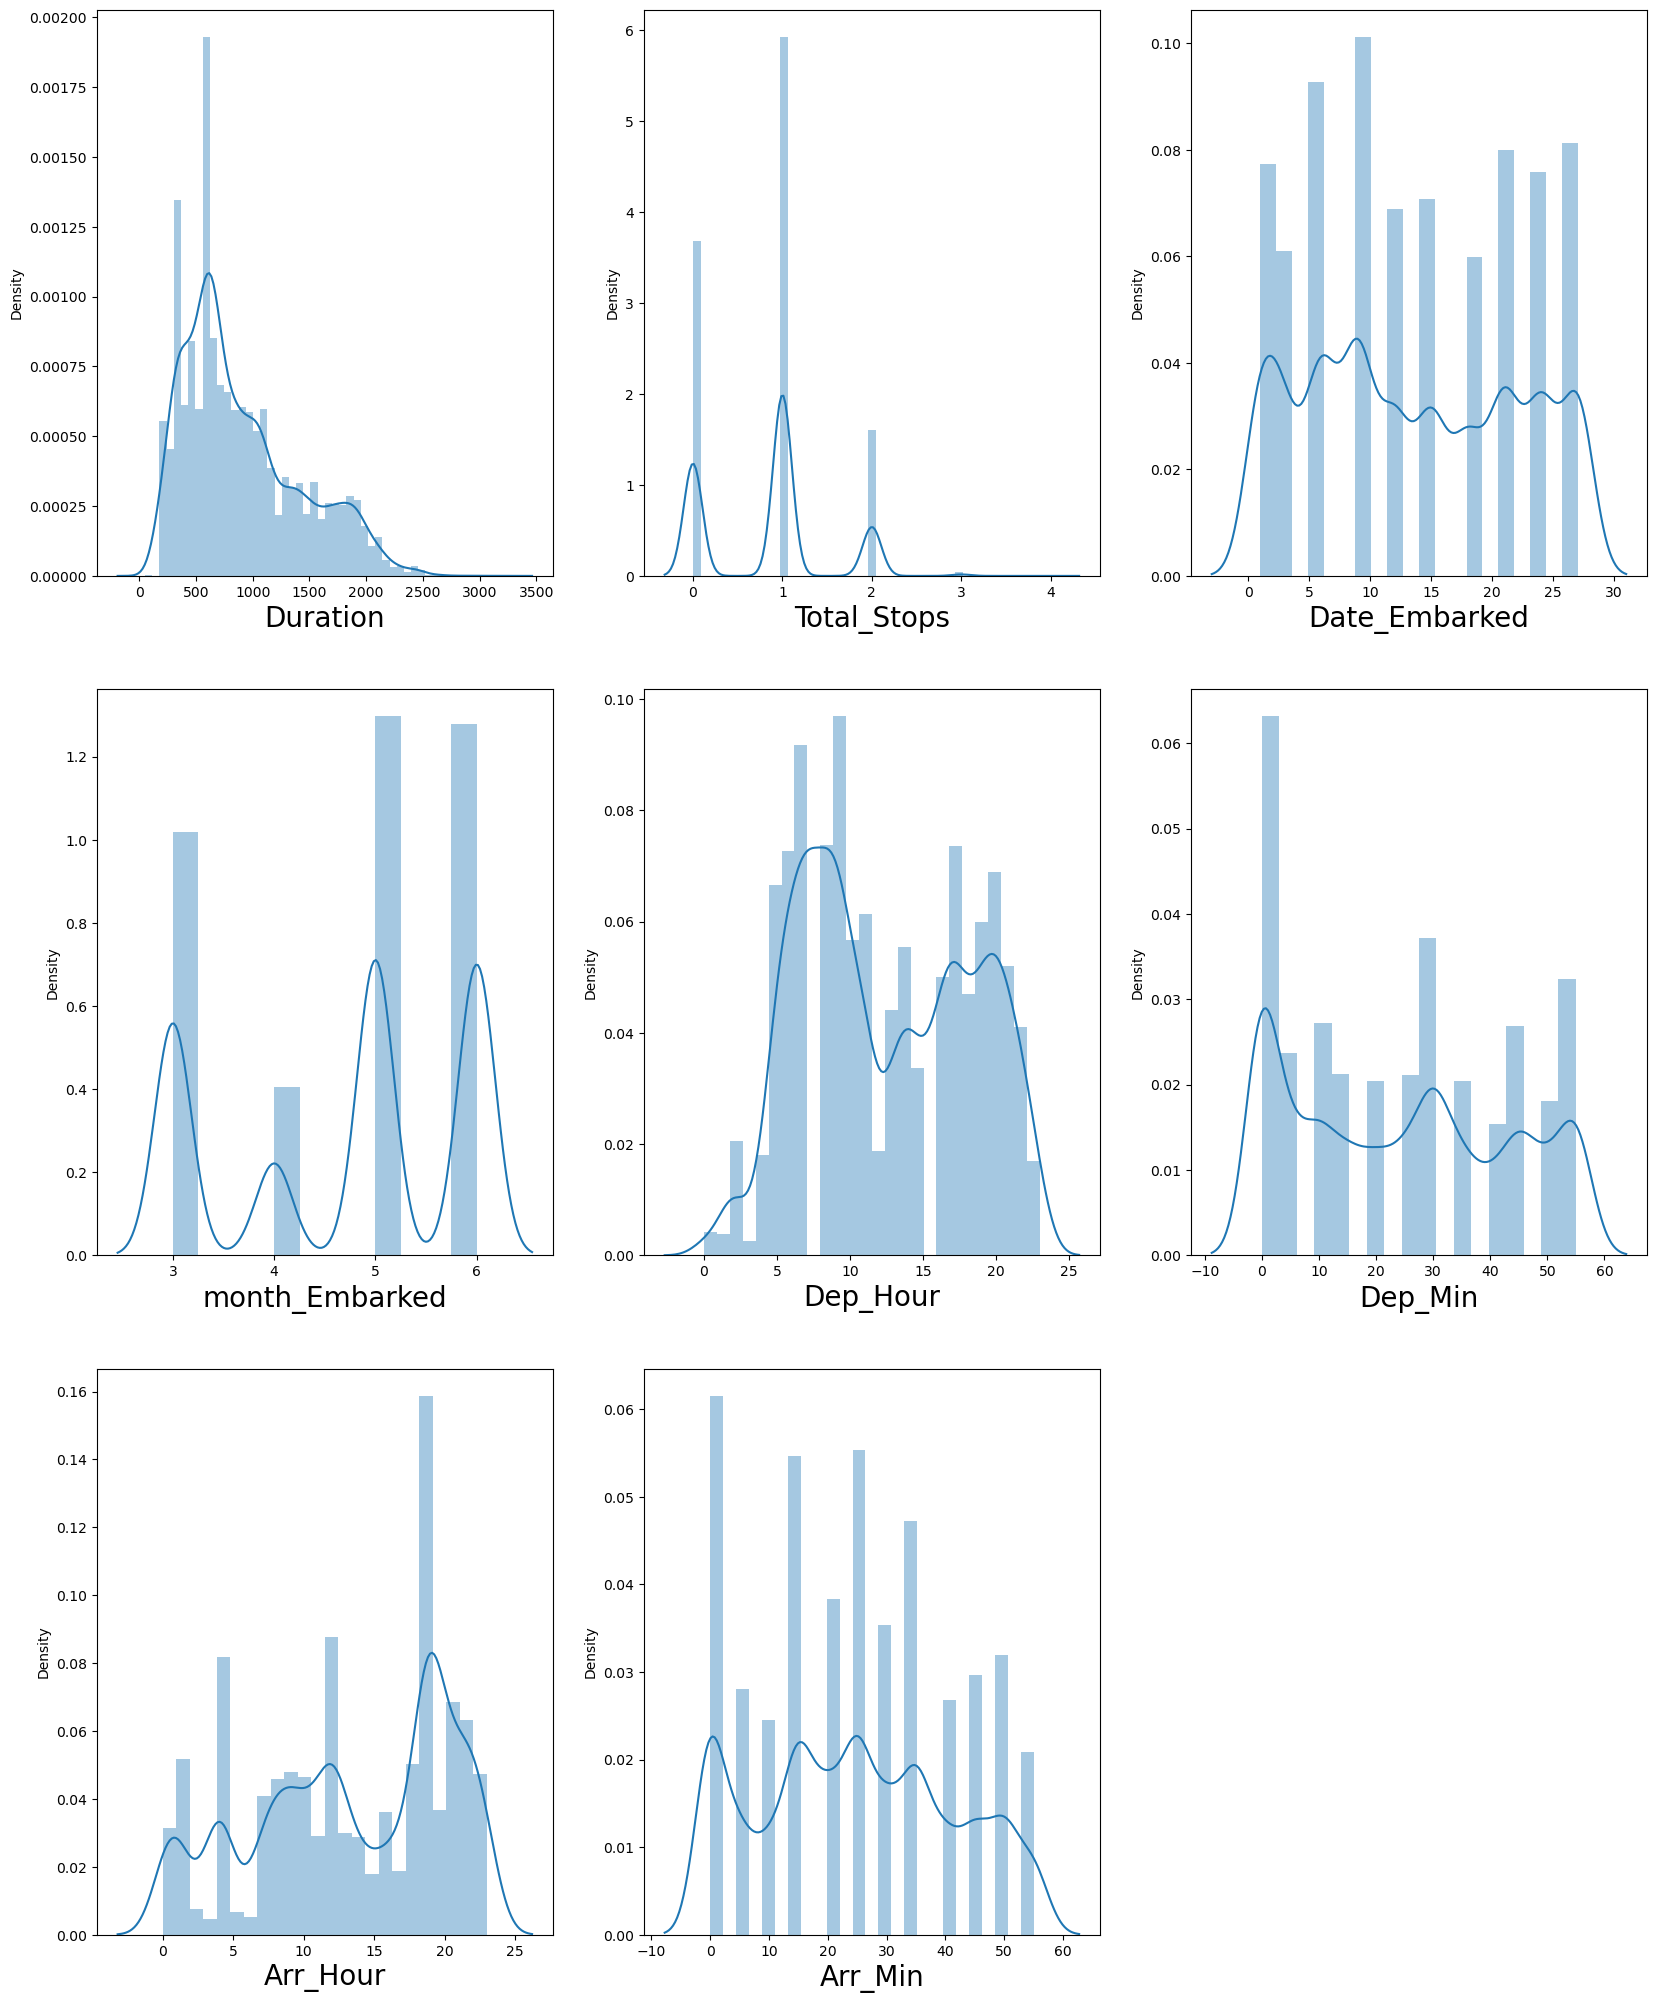

In [125]:
# let's see how data is distributed for every continious data point
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in cont_data:
    if plotnumber<=9 :     # as there are 10 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(cont_data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

# Categorical

In [126]:
cat_data = list(cat_data)

print(cat_data)

['Airline', 'Source', 'Destination', 'Additional_Info', 'Routes']


In [127]:
cat_data = data[cat_data]
cat_data

,Airline,Source,Destination,Additional_Info,Routes
0,IndiGo,Banglore,Delhi,No info,BLRDEL
1,Air India,Kolkata,Banglore,No info,CCUIXRBBIBLR
2,Jet Airways,Delhi,Cochin,No info,DELLKOBOMCOK
3,IndiGo,Kolkata,Banglore,No info,CCUNAGBLR
4,IndiGo,Banglore,Delhi,No info,BLRNAGDEL
...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,No info,CCUBLR
10679,Air India,Kolkata,Banglore,No info,CCUBLR
10680,Jet Airways,Banglore,Delhi,No info,BLRDEL
10681,Vistara,Banglore,Delhi,No info,BLRDEL


## Graph Representation of categorical dataset

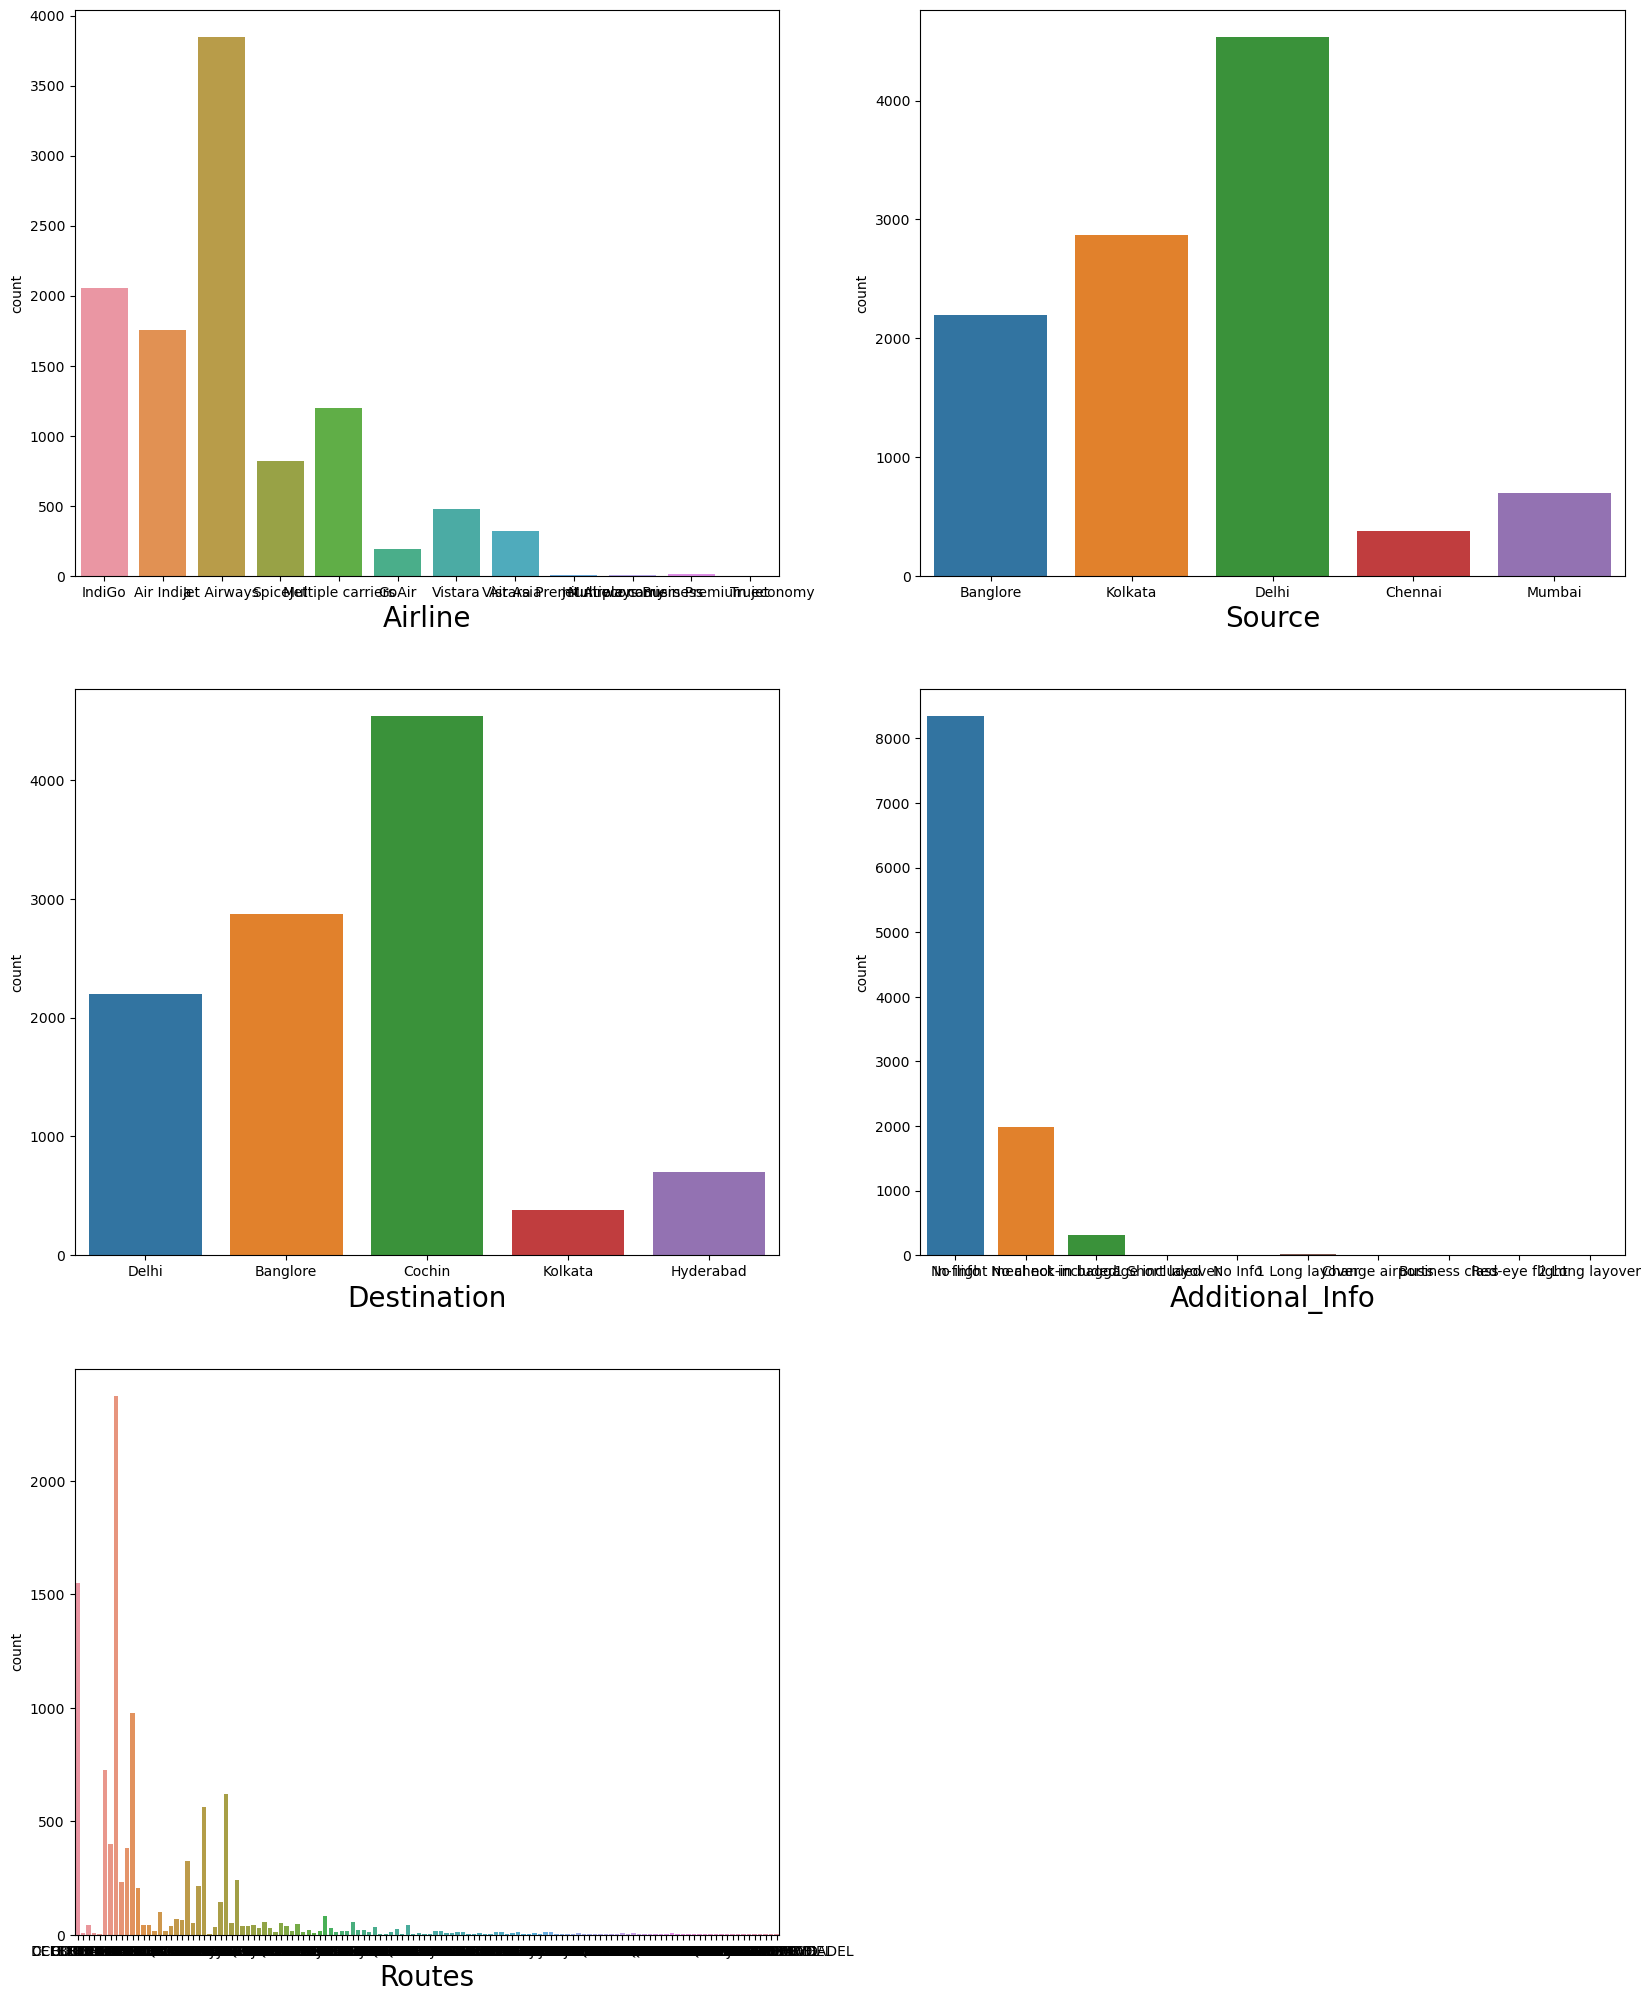

In [129]:
# let's see how data is distributed for every continious data point
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in cat_data:
    if plotnumber<=6 :     # as there are 10 columns in the data
        ax = plt.subplot(3,2,plotnumber)
        sns.countplot(cat_data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

# Checking for outliers in our continious features

A boxplot is a graphical representation of a dataset that summarizes its distribution, particularly its central tendency, dispersion, and skewness. It is also known as a box-and-whisker plot, and is commonly used in statistical analysis to compare the distribution of multiple datasets or to identify outliers.

In [130]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date_Embarked,month_Embarked,Routes,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,Delhi,621.0,0.0,No info,3897,24.0,3.0,BLRDEL,22.0,20.0,1.0,10.0
1,Air India,Kolkata,Banglore,671.0,2.0,No info,7662,1.0,5.0,CCUIXRBBIBLR,5.0,50.0,13.0,15.0
2,Jet Airways,Delhi,Cochin,1140.0,2.0,No info,13882,9.0,6.0,DELLKOBOMCOK,9.0,25.0,4.0,25.0
3,IndiGo,Kolkata,Banglore,551.0,1.0,No info,6218,12.0,5.0,CCUNAGBLR,18.0,5.0,23.0,30.0
4,IndiGo,Banglore,Delhi,691.0,1.0,No info,13302,1.0,3.0,BLRNAGDEL,16.0,50.0,21.0,35.0


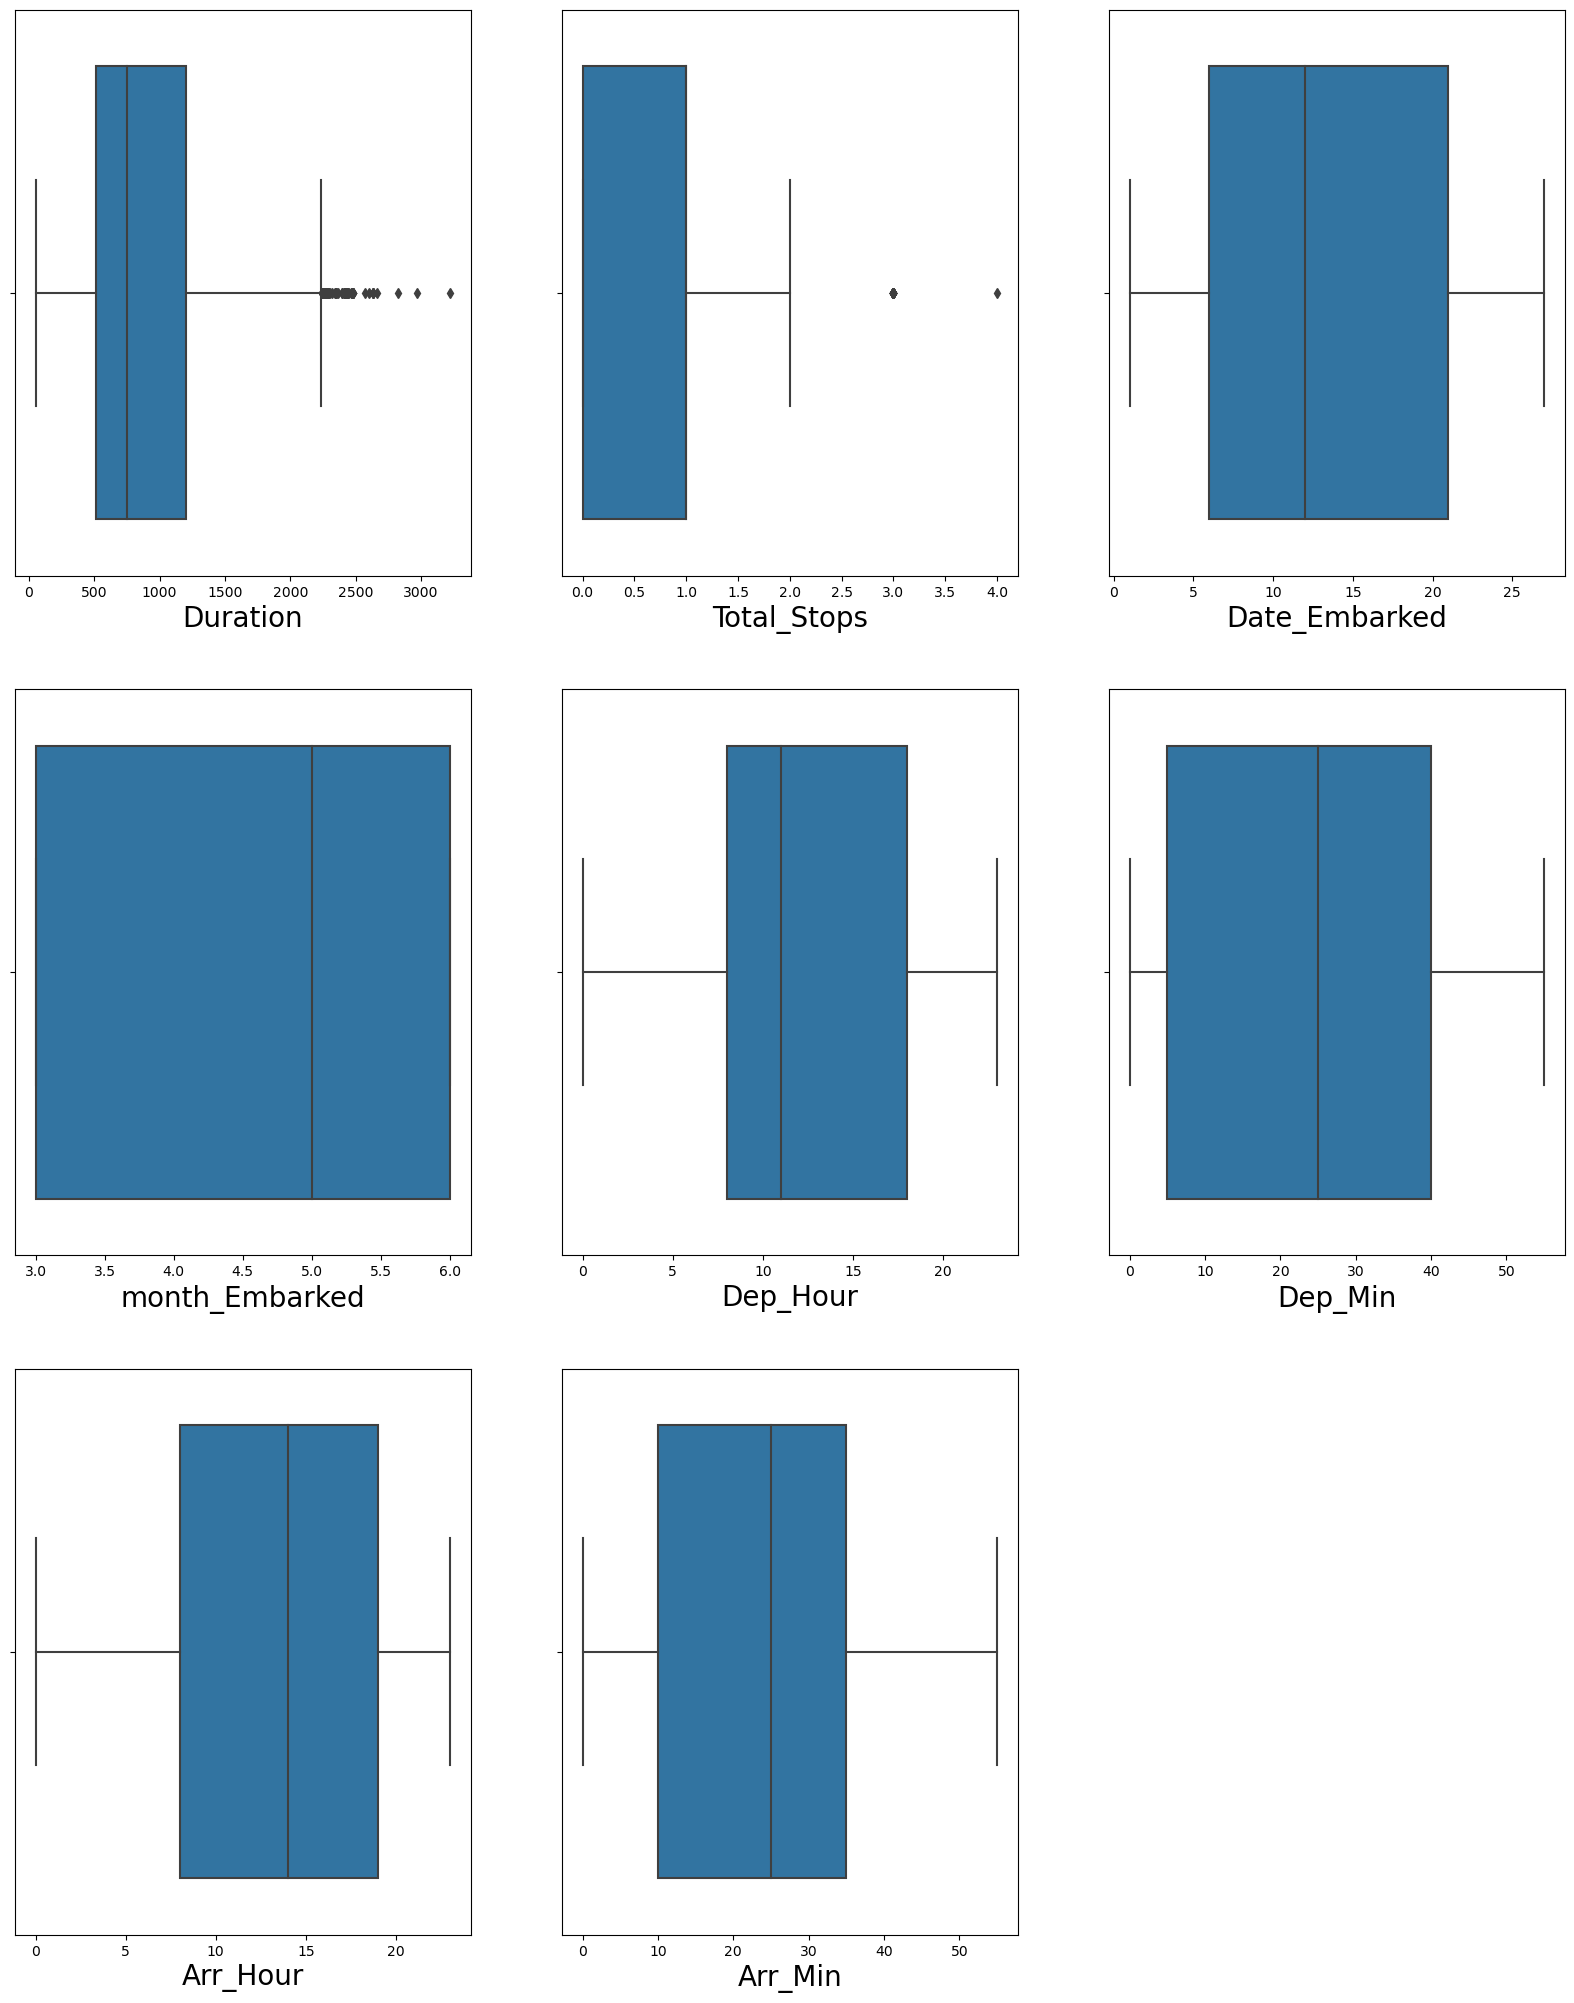

In [131]:
# let's see how data is distributed for every continious data point
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in cont_data:
    if plotnumber<=9 :     # as there are  columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(x= cont_data[column],data=data)
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

from the above plot, we realized that duration and total stop are the only features with outliers

<AxesSubplot:xlabel='Price'>

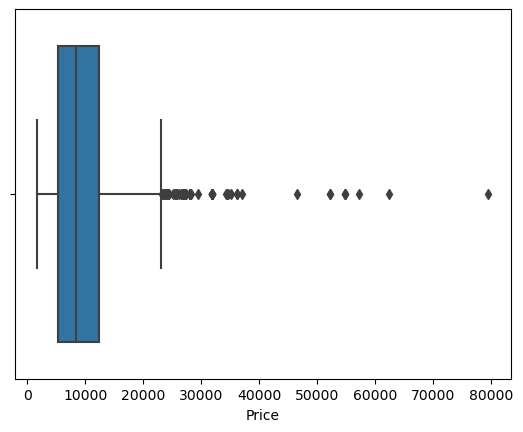

In [132]:
sns.boxplot(x='Price',data=data)

price feature which is the target variable has outliers in them

# Checking for Duplicates in the dataset

In [135]:
duplicates = data.duplicated()
duplicates.sum()

222

In [138]:
data[duplicates] #display the duplicate in a rows

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date_Embarked,month_Embarked,Routes,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
683,Jet Airways,Delhi,Cochin,1281.0,2.0,No info,13376,1.0,6.0,DELNAGBOMCOK,14.0,35.0,4.0,25.0
1061,Air India,Delhi,Cochin,1411.0,2.0,No info,10231,21.0,5.0,DELGOIBOMCOK,22.0,0.0,19.0,15.0
1348,Air India,Delhi,Cochin,1560.0,2.0,No info,12392,18.0,5.0,DELHYDBOMCOK,17.0,15.0,19.0,15.0
1418,Jet Airways,Delhi,Cochin,1871.0,2.0,In-flight meal not included,10368,6.0,6.0,DELJAIBOMCOK,5.0,30.0,4.0,25.0
1674,IndiGo,Banglore,Delhi,671.0,0.0,No info,7303,24.0,3.0,BLRDEL,18.0,25.0,21.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,Delhi,Cochin,1081.0,2.0,No info,12819,27.0,6.0,DELAMDBOMCOK,23.0,5.0,12.0,35.0
10616,Jet Airways,Delhi,Cochin,2111.0,2.0,No info,13014,1.0,6.0,DELJAIBOMCOK,9.0,40.0,12.0,35.0
10634,Jet Airways,Delhi,Cochin,2111.0,2.0,In-flight meal not included,11733,6.0,6.0,DELJAIBOMCOK,9.0,40.0,12.0,35.0
10672,Jet Airways,Delhi,Cochin,1691.0,2.0,In-flight meal not included,11150,27.0,6.0,DELAMDBOMCOK,23.0,5.0,19.0,0.0


In [139]:

# Remove duplicate rows based on all columns
data_unique = data.drop_duplicates()

In [140]:
data_unique.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date_Embarked,month_Embarked,Routes,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,Delhi,621.0,0.0,No info,3897,24.0,3.0,BLRDEL,22.0,20.0,1.0,10.0
1,Air India,Kolkata,Banglore,671.0,2.0,No info,7662,1.0,5.0,CCUIXRBBIBLR,5.0,50.0,13.0,15.0
2,Jet Airways,Delhi,Cochin,1140.0,2.0,No info,13882,9.0,6.0,DELLKOBOMCOK,9.0,25.0,4.0,25.0
3,IndiGo,Kolkata,Banglore,551.0,1.0,No info,6218,12.0,5.0,CCUNAGBLR,18.0,5.0,23.0,30.0
4,IndiGo,Banglore,Delhi,691.0,1.0,No info,13302,1.0,3.0,BLRNAGDEL,16.0,50.0,21.0,35.0


In [141]:
data_unique.shape

(10461, 14)

# Summary

after checking for duplicates, we realized that there are 222 duplicates in the dataset.

Solution is that, we need to drop those duplicates so that we can have a unique data and also our model can 
be well performed 

# Feature Selection

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

heatmap

feature_importance_

In [142]:
temp_data = data_unique.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['Price'])).sort_values(ascending=False)[1:])




--Correated Features with target variable--

Total_Stops        0.601963
Duration           0.454610
Destination        0.260673
Date_Embarked      0.158960
Routes             0.154196
month_Embarked     0.113613
Arr_Min            0.086295
Additional_Info    0.068737
Airline            0.036549
Arr_Hour           0.030841
Dep_Min            0.024210
Source             0.013596
Dep_Hour           0.005392
dtype: float64


In [143]:
temp_data

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date_Embarked,month_Embarked,Routes,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,3,0,2,621.0,0.0,8,3897,24.0,3.0,18,22.0,20.0,1.0,10.0
1,1,3,0,671.0,2.0,8,7662,1.0,5.0,84,5.0,50.0,13.0,15.0
2,4,2,1,1140.0,2.0,8,13882,9.0,6.0,118,9.0,25.0,4.0,25.0
3,3,3,0,551.0,1.0,8,6218,12.0,5.0,91,18.0,5.0,23.0,30.0
4,3,0,2,691.0,1.0,8,13302,1.0,3.0,29,16.0,50.0,21.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,421.0,0.0,8,4107,9.0,4.0,64,19.0,55.0,22.0,25.0
10679,1,3,0,471.0,0.0,8,4145,27.0,4.0,64,20.0,45.0,23.0,20.0
10680,4,0,2,180.0,0.0,8,7229,27.0,4.0,18,8.0,20.0,11.0,20.0
10681,10,0,2,521.0,0.0,8,12648,1.0,3.0,18,11.0,30.0,14.0,10.0


In [144]:
temp_data.to_csv('Clean_Data.csv')

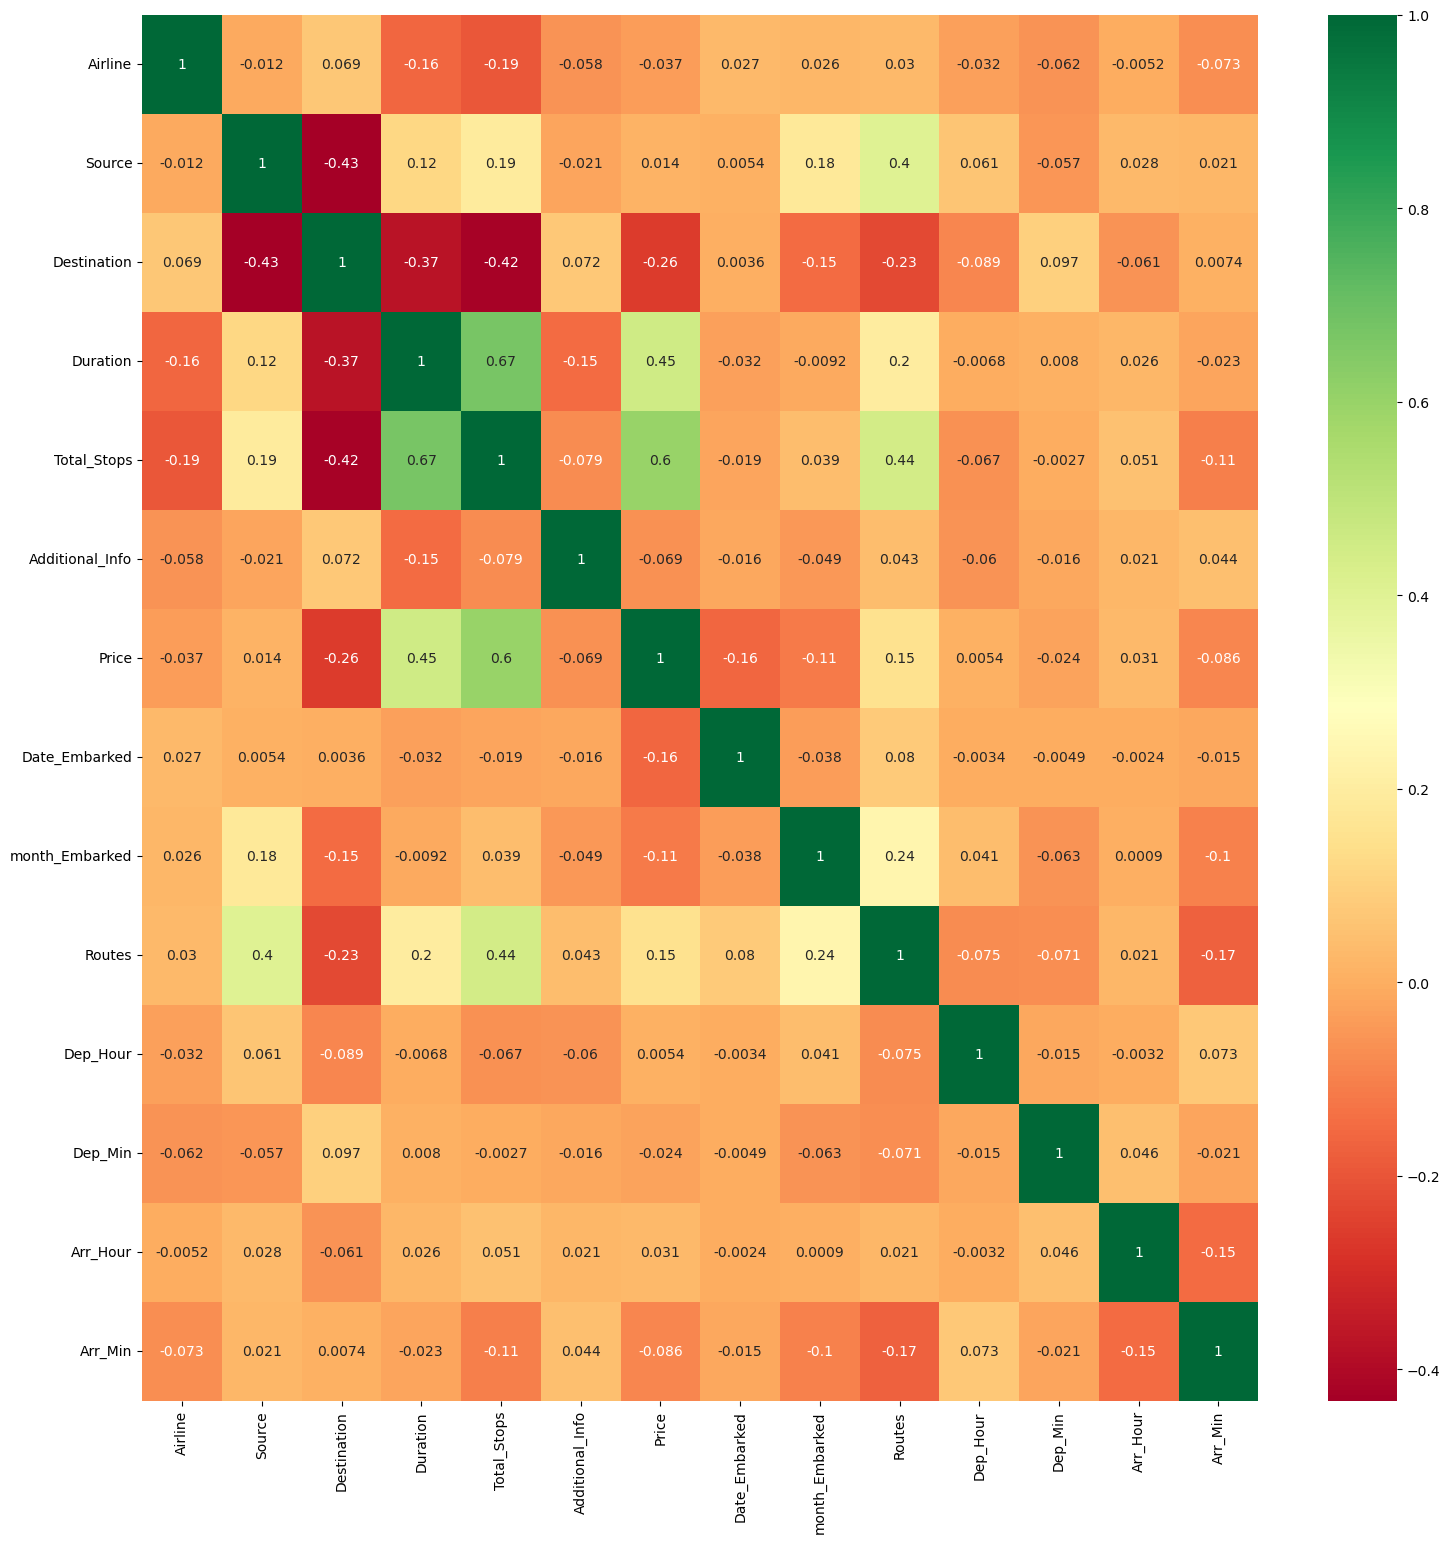

In [145]:
# Finds correlation between Independent and dependent attributes using heatmap

plt.figure(figsize = (18,18))
sns.heatmap(temp_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()



# Model Creation
Split dataset into train and test set in order to predict w.r.t X_test

If needed do scaling of data

    Scaling is not done in Random forest
    
Import model

Fit the data

Predict w.r.t X_test

In regression check RSME Score

Plot graph

In [148]:
y = temp_data.iloc[:, 6]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [147]:
data_train = temp_data.copy()
data_train.drop('Price', axis = 1, inplace = True)
data_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Date_Embarked,month_Embarked,Routes,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,3,0,2,621.0,0.0,8,24.0,3.0,18,22.0,20.0,1.0,10.0
1,1,3,0,671.0,2.0,8,1.0,5.0,84,5.0,50.0,13.0,15.0
2,4,2,1,1140.0,2.0,8,9.0,6.0,118,9.0,25.0,4.0,25.0
3,3,3,0,551.0,1.0,8,12.0,5.0,91,18.0,5.0,23.0,30.0
4,3,0,2,691.0,1.0,8,1.0,3.0,29,16.0,50.0,21.0,35.0


In [149]:
data_train.shape

(10461, 13)

In [162]:
temp_data = data.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['Price'])).sort_values(ascending=False)[1:])




--Correated Features with target variable--

Total_Stops        0.603883
Duration           0.461019
Destination        0.262157
Routes             0.164118
Date_Embarked      0.153738
month_Embarked     0.103651
Arr_Min            0.086155
Additional_Info    0.065478
Airline            0.039520
Dep_Min            0.024492
Arr_Hour           0.024264
Source             0.015998
Dep_Hour           0.006819
dtype: float64


In [159]:
#dropping the features that are less important

data_train.drop(["Arr_Min"], axis = 1, inplace = True)
data_train.drop(["Additional_Info"], axis = 1, inplace = True)
data_train.drop(["Airline"], axis = 1, inplace = True)
data_train.drop(["Dep_Min"], axis = 1, inplace = True)
data_train.drop(["Arr_Hour"], axis = 1, inplace = True)
data_train.drop(["Source"], axis = 1, inplace = True)
data_train.drop(["Dep_Hour"], axis = 1, inplace = True)

In [163]:
data_train

,Destination,Duration,Total_Stops,Date_Embarked,month_Embarked,Routes
0,2,621.0,0.0,24.0,3.0,18
1,0,671.0,2.0,1.0,5.0,84
2,1,1140.0,2.0,9.0,6.0,118
3,0,551.0,1.0,12.0,5.0,91
4,2,691.0,1.0,1.0,3.0,29
...,...,...,...,...,...,...
10678,0,421.0,0.0,9.0,4.0,64
10679,0,471.0,0.0,27.0,4.0,64
10680,2,180.0,0.0,27.0,4.0,18
10681,2,521.0,0.0,1.0,3.0,18


# lets check the linearity using a scatter plot

Text(0.5, 1.0, 'Price and Date_Embarked')

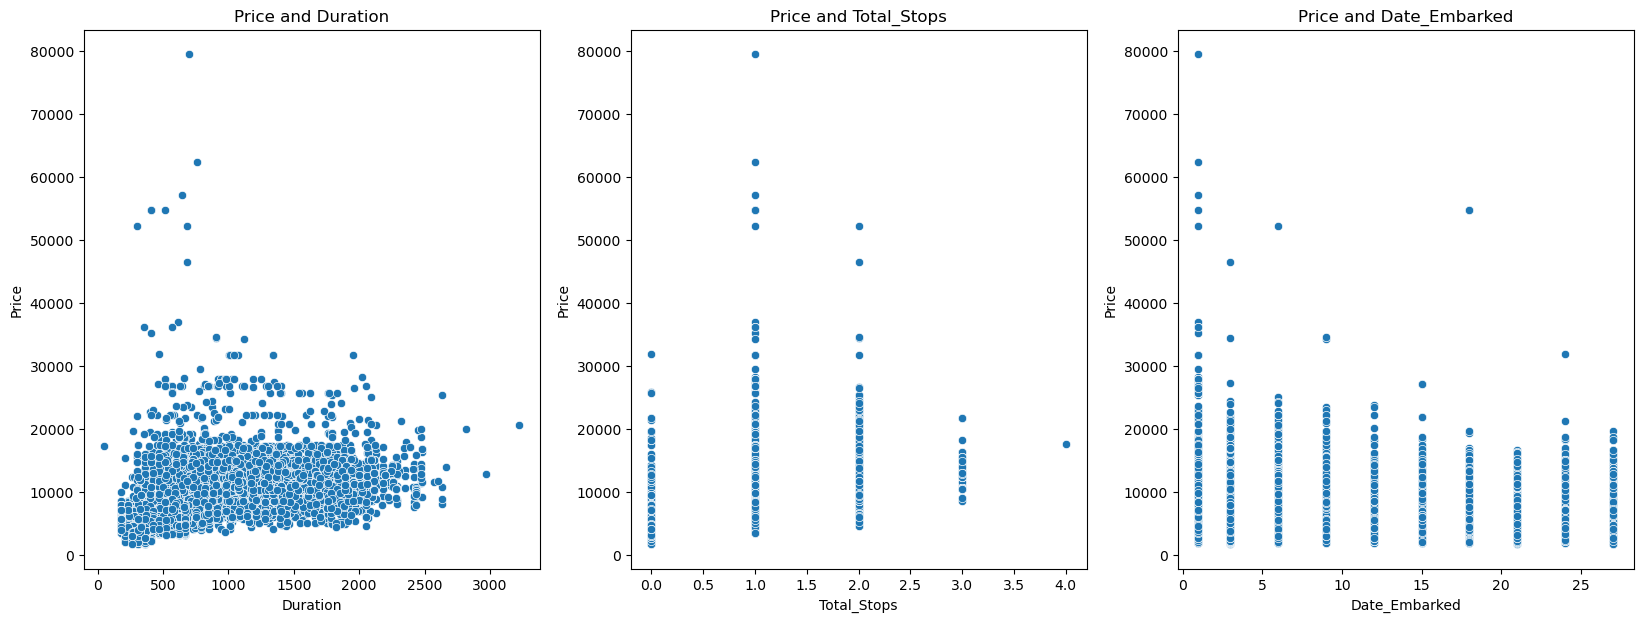

In [168]:
#Scatter Plot of independent variables vs dependent variables
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Duration")
sns.scatterplot(x='Duration',y='Price',data=data)

plt.subplot(1,3,2)
plt.title("Price and Total_Stops")
sns.scatterplot(x='Total_Stops', y='Price',data=data)

plt.subplot(1,3,3)
sns.scatterplot(x='Date_Embarked', y='Price',data=data)
plt.title("Price and Date_Embarked")



Text(0.5, 1.0, 'Price and Routes')

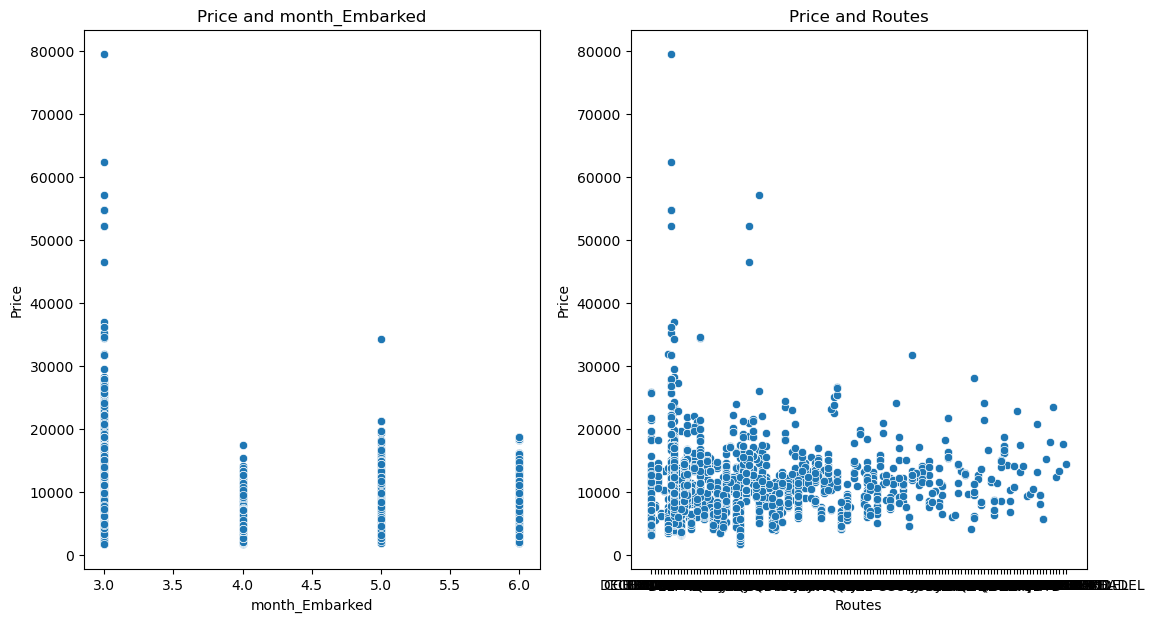

In [165]:
#Scatter Plot of independent variables vs dependent variables
plt.figure(figsize=[20,7])

plt.subplot(1,3,1)
plt.title("Price and month_Embarked")
sns.scatterplot(x='month_Embarked', y='Price',data=data)

plt.subplot(1,3,2)
sns.scatterplot(x='Routes', y='Price',data=data)
plt.title("Price and Routes")

<AxesSubplot:xlabel='Price', ylabel='Density'>

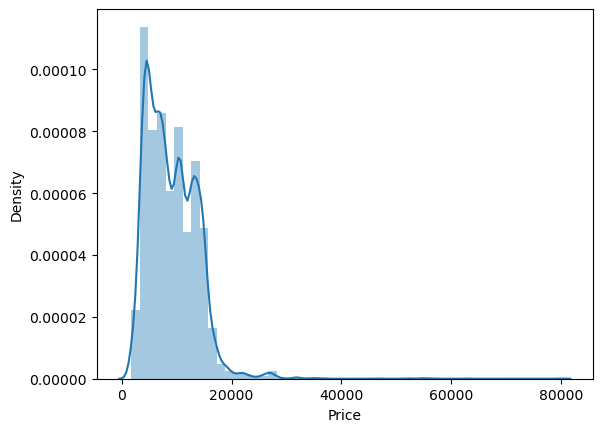

In [166]:
#recall the distribution plot of price
sns.distplot(data['Price'])

In [171]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data['Price'])

# Then we add it to our data frame
data_train['log_price'] = log_price
data_train.head()



,Destination,Duration,Total_Stops,Date_Embarked,month_Embarked,Routes,log_price
0,2,621.0,0.0,24.0,3.0,18,8.267962
1,0,671.0,2.0,1.0,5.0,84,8.944028
2,1,1140.0,2.0,9.0,6.0,118,9.538348
3,0,551.0,1.0,12.0,5.0,91,8.735204
4,2,691.0,1.0,1.0,3.0,29,9.495670


Text(0.5, 1.0, 'Price and Date_Embarked')

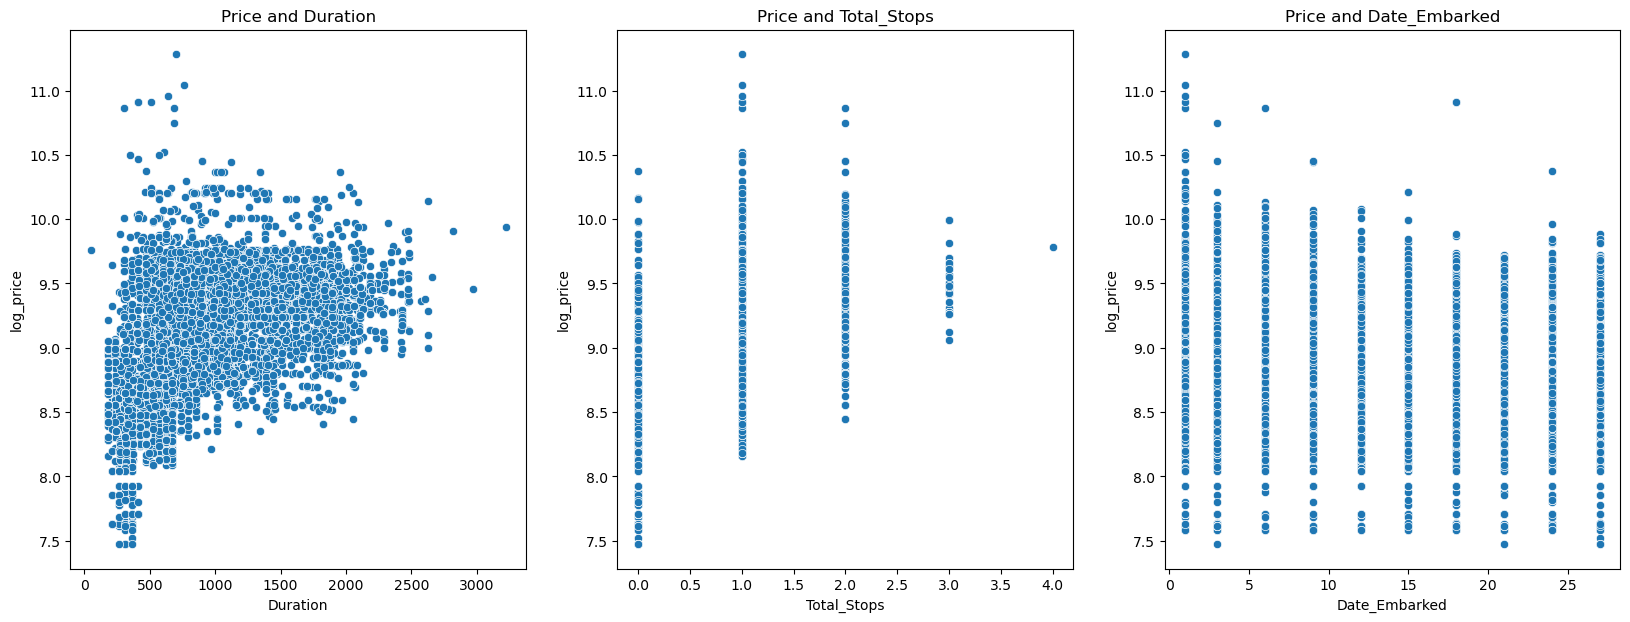

In [172]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Duration")
sns.scatterplot(x='Duration',y='log_price',data=data_train)

plt.subplot(1,3,2)
plt.title("Price and Total_Stops")
sns.scatterplot(x='Total_Stops', y='log_price',data=data_train)

plt.subplot(1,3,3)
sns.scatterplot(x='Date_Embarked', y='log_price',data=data_train)
plt.title("Price and Date_Embarked")

<AxesSubplot:title={'center':'Price and month_Embarked'}, xlabel='month_Embarked', ylabel='log_price'>

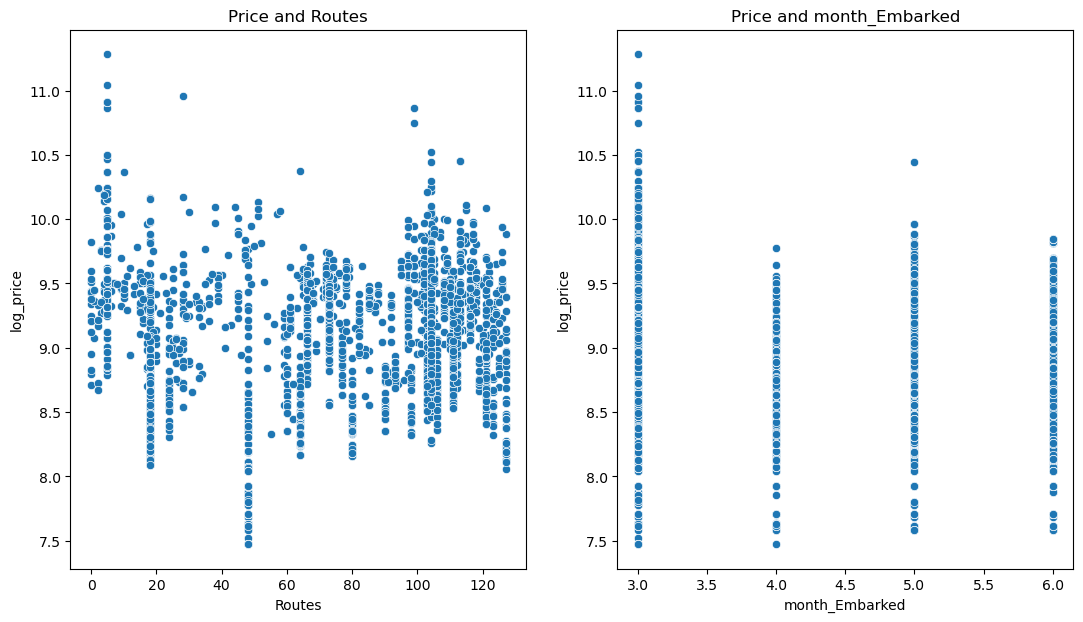

In [176]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Routes")
sns.scatterplot(x='Routes',y='log_price',data=data_train)

plt.subplot(1,3,2)
plt.title("Price and month_Embarked")
sns.scatterplot(x='month_Embarked', y='log_price',data=data_train)



<AxesSubplot:xlabel='log_price', ylabel='Density'>

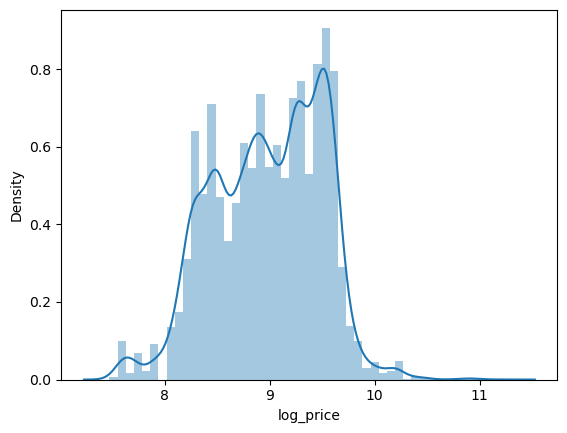

In [177]:
#recall the distribution plot of price
sns.distplot(data_train['log_price'])

In [178]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
X = data_train.drop('log_price',axis=1)
y = data_train['log_price']
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

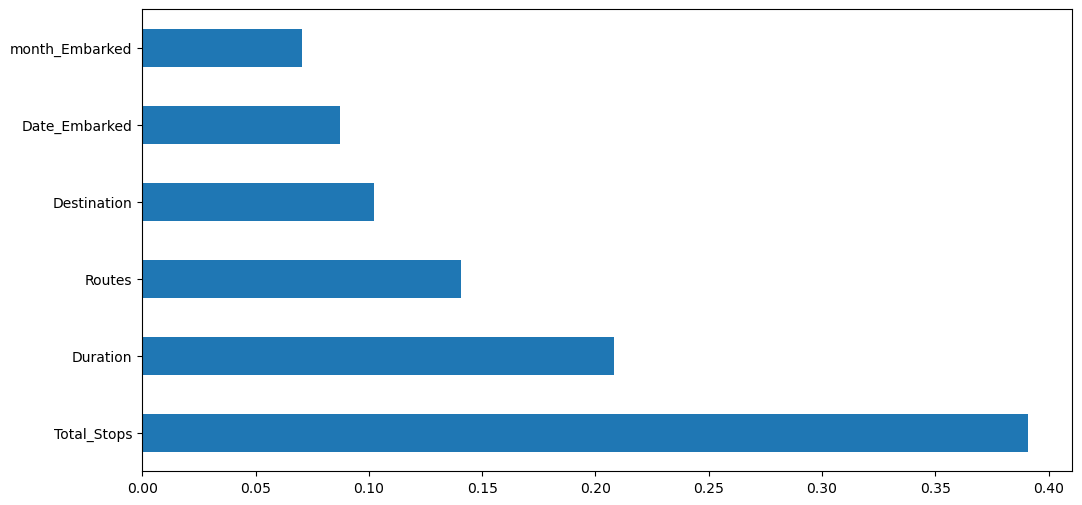

In [179]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [180]:
print(feat_importances.sort_values(ascending=False))

Total_Stops       0.390815
Duration          0.208214
Routes            0.140774
Destination       0.102179
Date_Embarked     0.087473
month_Embarked    0.070546
dtype: float64


In [181]:
X

,Destination,Duration,Total_Stops,Date_Embarked,month_Embarked,Routes
0,2,621.0,0.0,24.0,3.0,18
1,0,671.0,2.0,1.0,5.0,84
2,1,1140.0,2.0,9.0,6.0,118
3,0,551.0,1.0,12.0,5.0,91
4,2,691.0,1.0,1.0,3.0,29
...,...,...,...,...,...,...
10678,0,421.0,0.0,9.0,4.0,64
10679,0,471.0,0.0,27.0,4.0,64
10680,2,180.0,0.0,27.0,4.0,18
10681,2,521.0,0.0,1.0,3.0,18


In [182]:
y

0        8.267962
1        8.944028
2        9.538348
3        8.735204
4        9.495670
           ...   
10678    8.320448
10679    8.329658
10680    8.885856
10681    9.445254
10682    9.371864
Name: log_price, Length: 10461, dtype: float64

# Training and Testing Data

In [183]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [184]:
def get_metrics(model):
    print(f'Train score {model.score(x_train, y_train)}')
    print(f'Test score {model.score(x_test, y_test)}')
    print("MAE:" , mean_absolute_error(y_test,model.predict(x_test)))
    print("MSE:" , mean_squared_error(y_test,model.predict(x_test)))
    print("RMSE:" , np.sqrt(mean_squared_error(y_test,model.predict(x_test))))




# Linear Regression Model

In [187]:
# Model Building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.5183619092724705
RMSE : 0.35705413957985144


# Random Forest Regressor Model

In [190]:
# Model Building
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)
print("RMSE :",rmse)


R_squared : 0.775832356807435
RMSE : 0.24359037409244927


# GBT Regressor Model

In [191]:
# Model Building
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(x_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(x_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)
print("RMSE :",rmse)



R_squared : 0.766896380759814
RMSE : 0.2483980417439623


# XGBoost Regressor Model

In [192]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

xg= XGBRegressor()

# Training Model
xg.fit(x_train, y_train)

# Model Summary
Y_pred_xg= xg.predict(x_test)

r_squared = r2_score(y_test,Y_pred_xg)
rmse = np.sqrt(mean_squared_error(y_test,Y_pred_xg))
print("R_squared :",r_squared)
print("MAE :",mean_absolute_error(y_test,Y_pred_xg))
print('MSE:', mean_squared_error(y_test, Y_pred_xg))
print("RMSE :",rmse)

R_squared : 0.8145766822592974
MAE : 0.1627273515887291
MSE: 0.04908080378619869
RMSE : 0.22154187817701348


# Select The Best Model

So as we try diferent Regression Alorithms and found that "XGBoost Regressor Model"* is giving better accuracy compare to other.*

# let's manually check these predictions

In [193]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(Y_pred_xg), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev.tail(20)

,Predicted Price,Actual Price,Residual,Difference%
2073,11034.93,10844.00,-190.93,1.76
2074,6596.66,6117.00,-479.66,7.84
2075,2928.50,2385.00,-543.50,22.79
2076,4596.72,4668.00,71.28,1.53
2077,11010.67,14388.00,3377.33,23.47
2078,4142.88,3383.00,-759.88,22.46
2079,11988.48,10844.00,-1144.48,10.55
2080,5118.84,4077.00,-1041.84,25.55
2081,8109.51,10351.00,2241.49,21.65
2082,4370.69,4462.00,91.31,2.05


# Hyper parameter tuning Using Random Forest

In [194]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)


grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(x_train, y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.768 using {'n_estimators': 1000}
0.760 (0.002) with: {'n_estimators': 10}
0.768 (0.003) with: {'n_estimators': 100}
0.768 (0.004) with: {'n_estimators': 1000}


In [195]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [196]:
grid_search_forest.best_score_

0.7680089764635668

In [197]:
Y_pred_rf_grid=grid_search_forest.predict(x_test)

In [198]:
r2_score(y_test,Y_pred_rf_grid)

0.7763927571257289

In [199]:
def get_metrics(model):
    print(f'Train score {model.score(x_train, y_train)}')
    print(f'Test score {model.score(x_test, y_test)}')
    print("MAE:" , mean_absolute_error(y_test,model.predict(x_test)))
    print("MSE:" , mean_squared_error(y_test,model.predict(x_test)))
    print("RMSE:" , np.sqrt(mean_squared_error(y_test,model.predict(x_test))))


In [200]:
get_metrics(grid_search_forest)

Train score 0.8960209489058928
Test score 0.7763927571257289
MAE: 0.17509049062991894
MSE: 0.059187934648177586
RMSE: 0.24328570580323372


# Hyper parameter tuning Using XGBoost Regressor Model

In [202]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = XGBRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)


grid_search_xgboost = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_xgboost.fit(x_train, y_train)

# summarize results
print(f"Best: {grid_search_xgboost.best_score_:.3f} using {grid_search_xgboost.best_params_}")
means = grid_search_xgboost.cv_results_['mean_test_score']
stds = grid_search_xgboost.cv_results_['std_test_score']
params = grid_search_xgboost.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")


Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.795 using {'n_estimators': 100}
0.529 (0.004) with: {'n_estimators': 10}
0.795 (0.003) with: {'n_estimators': 100}
0.738 (0.004) with: {'n_estimators': 1000}


In [203]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [204]:
grid_search_forest.best_score_

0.7680089764635668

In [205]:
Y_pred_rf_grid=grid_search_forest.predict(x_test)

In [206]:
get_metrics(grid_search_forest)

Train score 0.8960209489058928
Test score 0.7763927571257289
MAE: 0.17509049062991894
MSE: 0.059187934648177586
RMSE: 0.24328570580323372


In [207]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(Y_pred_rf_grid), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev.tail(20)

,Predicted Price,Actual Price,Residual,Difference%
2073,11504.21,10844.00,-660.21,6.09
2074,6774.06,6117.00,-657.06,10.74
2075,2849.46,2385.00,-464.46,19.47
2076,4355.27,4668.00,312.73,6.70
2077,10086.78,14388.00,4301.22,29.89
2078,4084.13,3383.00,-701.13,20.72
2079,13085.99,10844.00,-2241.99,20.67
2080,5241.52,4077.00,-1164.52,28.56
2081,9818.34,10351.00,532.66,5.15
2082,4428.78,4462.00,33.22,0.74


[CV] END ....................................n_estimators=10; total time=   0.2s
[CV] END ..................................n_estimators=1000; total time=  13.0s
[CV] END ...................................n_estimators=100; total time=   1.2s
[CV] END ....................................n_estimators=10; total time=   0.3s
[CV] END ..................................n_estimators=1000; total time=  12.8s
[CV] END ...................................n_estimators=100; total time=   1.1s
[CV] END ...................................n_estimators=100; total time=   1.8s
[CV] END ....................................n_estimators=10; total time=   0.2s
[CV] END ..................................n_estimators=1000; total time=   5.0s
[CV] END ...................................n_estimators=100; total time=   1.8s
[CV] END ....................................n_estimators=10; total time=   0.2s
[CV] END ..................................n_estimators=1000; total time=   5.1s
